## 

<div style="text-align:center">
    <h1>INDIVIDUAL PROJECT N° 1</h1>
</div>



### MACHINE LEARNING OPERATIONS

##### JOAQUIN MILLAN LANHOZO

##### File reading

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
import ast
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
# Informative dictionary about the meanings of the variables in the 'movies' dataset

dictionary_features = pd.read_excel("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/1. PI_ML_OPS/Diccionario de Datos - Movies.xlsx")
dictionary_features.head(2)

Característica                                        Descripción
0                  adult  Indica si la película tiene califiación X, exc...
1  belongs_to_collection  Un diccionario que indica a que franquicia o s...

This dataset dictionary originally is in Spanish. So I'll translate the dictionary:

- "adult" --> Indicates with an X that the movie is exclusevely for adults,
- "bellongs_to_collection" --> A dictionary that indicates to which film franchise or series a movie belongs.
- "budget" --> Budget of the movie in USD dollars.
- "genres" --> A dictionary that indicates all the genres associated to a movie.
- "homepage" --> Official website of the movie.
- "id" --> Id of the movie.
- "imbd_id" --> IMBD Id of the movie.
- "original_language" --> The original language in which the movie was recorded.
- "original_title" --> Movies original title.
- "overview" --> Briefly summary of the movie.
- "popularity" --> Popularity score of the movie, assigned by TMDB (TheMoviesDataBase).
- "poster_path" --> Movie poster URL.
- "production_companies" --> List of production companies associated with the movie.
- "production_countries" --> List of countries where the movie was produced.
- "release_date" --> Release date of the movie.
- "revenue" --> Box office revenue of the movie, in dollars.
- "runtime" --> Duration of the movie, in minutes.
- "spoken_languages" --> List of languages spoken in the movie.
- "status" --> Current status of the movie (if it was announced, if it has already been released, etc).
- "tagline" --> Famous quote associated with the movie.
- "title" --> Title of the movie.
- "video" --> Indication of whether or not a video trailer is available on TMDB.
- "vote_average" --> Average review score of the movie.
- "vote_count" --> Number of votes received by the movie on TMDB.


In [3]:
# I read the information from the movies dataset and look at the first records. Description of the recently viewed variables.

movies = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/1. PI_ML_OPS/movies_dataset.csv")
movies.head()

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\1408514131.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/1. PI_ML_OPS/movies_dataset.csv")


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [4]:
# View of the last 5 movies in the dataset

movies.tail()

adult belongs_to_collection budget  \
45461  False                   NaN      0   
45462  False                   NaN      0   
45463  False                   NaN      0   
45464  False                   NaN      0   
45465  False                   NaN      0   

                                                  genres  \
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language       original_title  \
45461                fa              رگ خواب   
45462                tl  Siglo ng Pagluluwal   
45463                en             Betrayal   
45464                en  Satana likuyushchiy   
45465                en             Queerama   

                                                overview  ... release_date  \
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisation of homosexual...  ...   2017-06-09   

      revenue runtime                          spoken_languages    status  \
45461     0.0    90.0    [{'iso_639_1': 'fa', 'name': 'فارسی'}]  Released   
45462     0.0   360.0         [{'iso_639_1': 'tl', 'name': ''}]  Released   
45463     0.0    90.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
45464     0.0    87.0                                        []  Released   
45465     0.0    75.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                          tagline                title  video  \
45461  Rising and falling between a man and woman               Subdue  False   
45462                                         NaN  Century of Birthing  False   
45463                      A deadly game of wits.             Betrayal  False   
45464                                         NaN     Satan Triumphant  False   
45465                                         NaN             Queerama  False   

      vote_average vote_count  
45461          4.0        1.0  
45462          9.0        3.0  
45463          3.8        6.0  
45464          0.0        0.0  
45465          0.0        0.0  

[5 rows x 24 columns]

In [5]:
# I read the other credits dataset. It has 3 columns, but with the movie ID, the cast, and the crew of the movies all grouped together

credits = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/1. PI_ML_OPS/credits.csv")
credits

cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
45471  [{'cast_id': 0, 'character': '', 'credit_id': ...   
45472  [{'cast_id': 1002, 'character': 'Sister Angela...   
45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
45474  [{'cast_id': 2, 'character': '', 'credit_id': ...   
45475                                                 []   

                                                    crew      id  
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862  
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844  
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15602  
3      [{'credit_id': '52fe44779251416c91011acb', 'de...   31357  
4      [{'credit_id': '52fe44959251416c75039ed7', 'de...   11862  
...                                                  ...     ...  
45471  [{'credit_id': '5894a97d925141426c00818c', 'de...  439050  
45472  [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...  111109  
45473  [{'credit_id': '52fe4776c3a368484e0c8387', 'de...   67758  
45474  [{'credit_id': '533bccebc3a36844cf0011a7', 'de...  227506  
45475  [{'credit_id': '593e676c92514105b702e68e', 'de...  461257  

[45476 rows x 3 columns]

#### First look to the dataframes

In [6]:
# We check how many rows (records) and columns (features) the dataframes have.

movies.shape

(45466, 24)

In [7]:
# We gather information about data types and null values.

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
# I check the null values and their percentage of representation in the total dataset

null_movies = pd.DataFrame(movies.isnull().sum().sort_values(ascending = False))
null_movies["Nulls percentage"] = round(null_movies/movies.shape[0]*100,2)
null_movies.rename(columns = {0:"N° of nulls"})

N° of nulls  Nulls percentage
belongs_to_collection        40972             90.12
homepage                     37684             82.88
tagline                      25054             55.10
overview                       954              2.10
poster_path                    386              0.85
runtime                        263              0.58
status                          87              0.19
release_date                    87              0.19
imdb_id                         17              0.04
original_language               11              0.02
spoken_languages                 6              0.01
title                            6              0.01
video                            6              0.01
vote_average                     6              0.01
revenue                          6              0.01
vote_count                       6              0.01
popularity                       5              0.01
production_companies             3              0.01
production_countries             3              0.01
original_title                   0              0.00
id                               0              0.00
genres                           0              0.00
budget                           0              0.00
adult                            0              0.00

<Axes: >

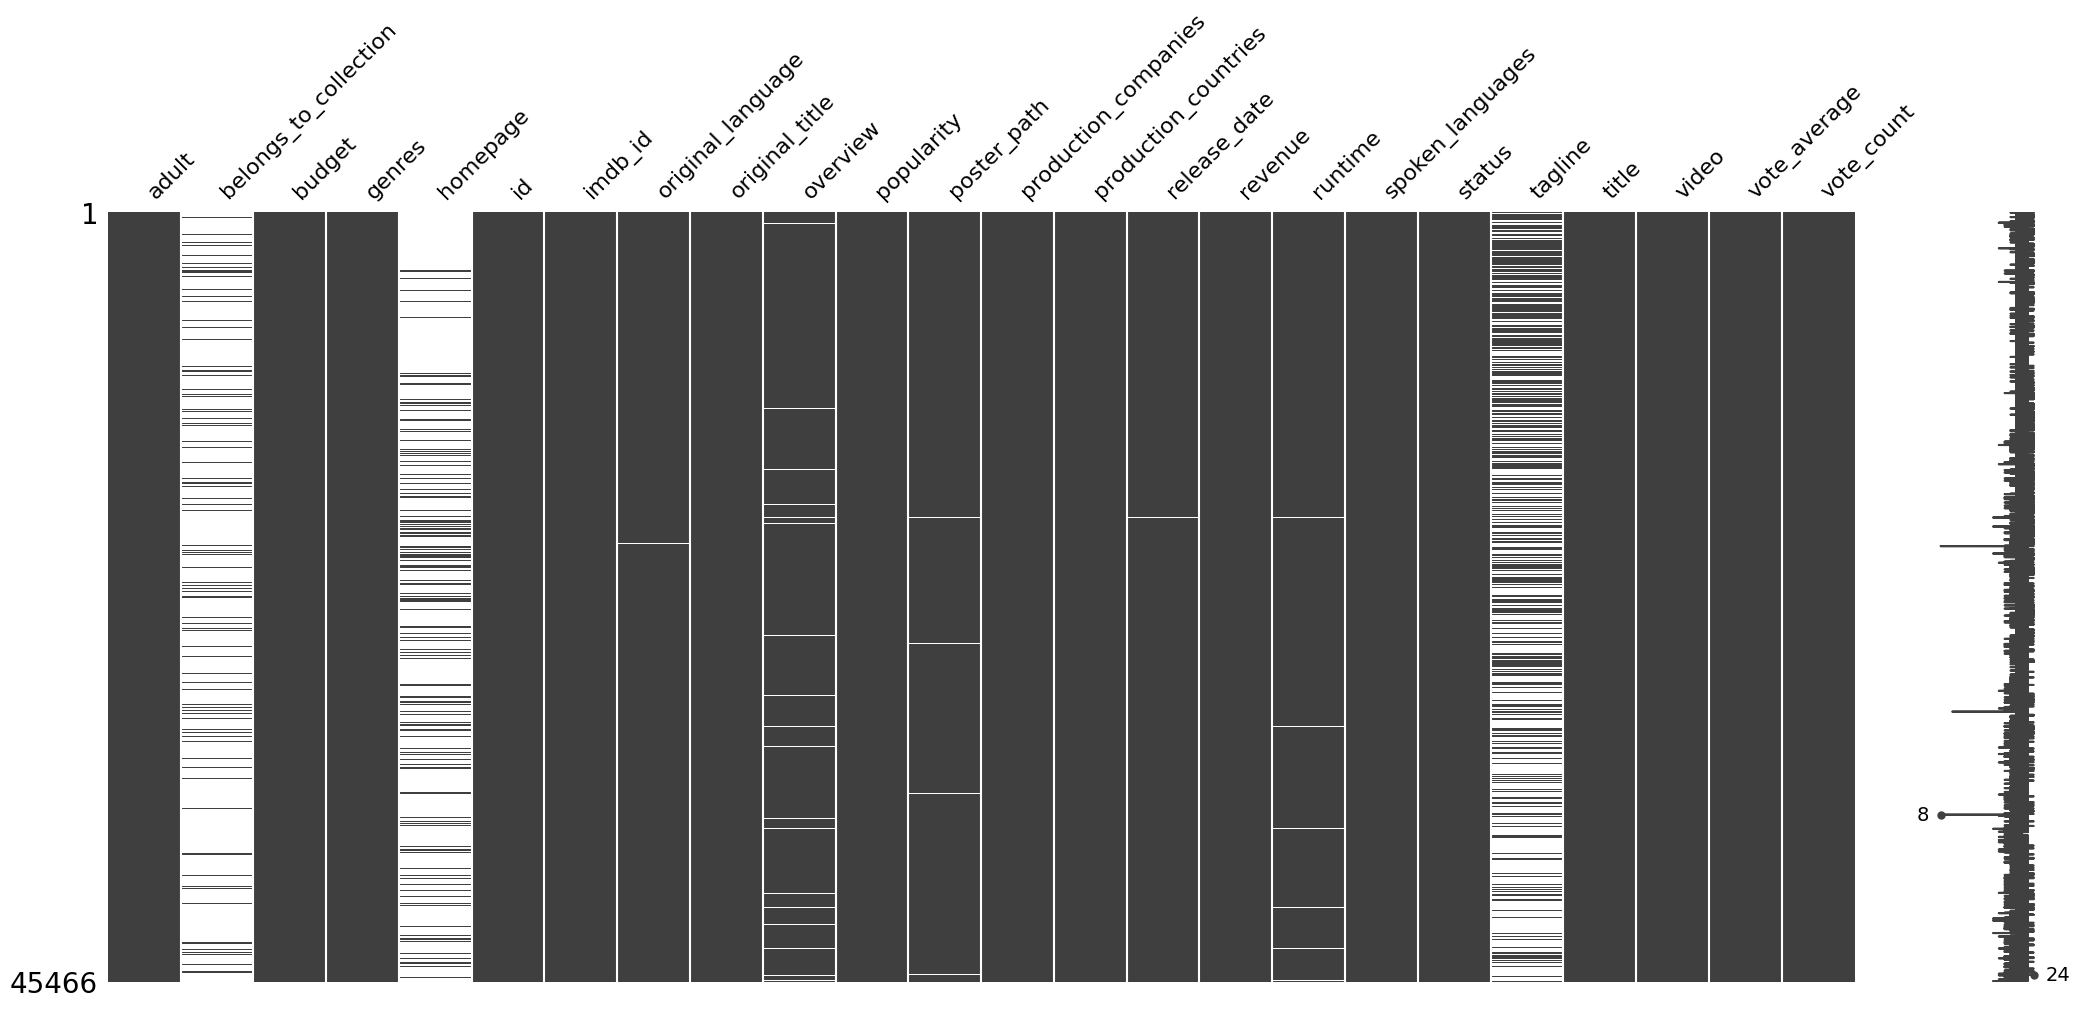

In [9]:
# Visualization to further explore the null values in greater depth.

msno.matrix(movies)

In [10]:
# Checking if there are duplicated rows.

movies.duplicated().sum()

13

In [11]:
# Looking duplicated values

duplicados_movies = movies[movies.duplicated()]

# The only duplicates I see when filtering these columns are the id_index 13375 and 16764.

duplicados_movies[["title", "id", "overview", "tagline","release_date", "runtime"]].sort_values(by="title")



title      id  \
13375                        Blackout  141971   
16764                        Blackout  141971   
23044                     Brotherhood   25541   
40040           Cemetery of Splendour  298721   
22151                Days of Darkness   18440   
24844                            Deal   11115   
29374                       King Lear   42495   
9165                      Le Samouraï    5511   
28860  Nana, the True Key of Pleasure  168538   
21854                    The Congress  152795   
1465                      The Promise  105045   
21165                     The Tempest  119916   
9327                      The Warrior   23305   

                                                overview  \
13375  Recovering from a nail gun shot to the head an...   
16764  Recovering from a nail gun shot to the head an...   
23044  Former Danish servicemen Lars and Jimmy are th...   
40040  In a hospital, ten soldiers are being treated ...   
22151  When a comet strikes Earth and kicks up a clou...   
24844  As an ex-gambler teaches a hot-shot college ki...   
29374  King Lear, old and tired, divides his kingdom ...   
9165   Hitman Jef Costello is a perfectionist who alw...   
28860  In Zola's Paris, an ingenue arrives at a tony ...   
21854  More than two decades after catapulting to sta...   
1465   East-Berlin, 1961, shortly after the erection ...   
21165  Prospero, the true Duke of Milan is now living...   
9327   In feudal India, a warrior (Khan) who renounce...   

                                                 tagline release_date  runtime  
13375  Which one is the first to return - memory or t...   2008-12-26    108.0  
16764  Which one is the first to return - memory or t...   2008-12-26    108.0  
23044                                                NaN   2009-10-21     90.0  
40040                                                NaN   2015-09-02    122.0  
22151                                                NaN   2007-01-01     89.0  
24844                                                NaN   2008-01-29     85.0  
29374                                                NaN   1971-02-04    137.0  
9165   There is no solitude greater than that of the ...   1967-10-25    105.0  
28860                                                NaN   1983-06-13     92.0  
21854                                                NaN   2013-05-16    122.0  
1465                             A love, a hope, a wall.   1995-02-16    115.0  
21165                                                NaN   1980-02-27    123.0  
9327                                                 NaN   2001-09-23     86.0

In [12]:
# These two records are indeed duplicated, let's delete them.

movies.loc[[16764,13375]]

adult belongs_to_collection budget  \
16764  False                   NaN      0   
13375  False                   NaN      0   

                                                  genres homepage      id  \
16764  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...      NaN  141971   
13375  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...      NaN  141971   

         imdb_id original_language original_title  \
16764  tt1180333                fi       Blackout   
13375  tt1180333                fi       Blackout   

                                                overview  ... release_date  \
16764  Recovering from a nail gun shot to the head an...  ...   2008-12-26   
13375  Recovering from a nail gun shot to the head an...  ...   2008-12-26   

      revenue runtime                        spoken_languages    status  \
16764     0.0   108.0  [{'iso_639_1': 'fi', 'name': 'suomi'}]  Released   
13375     0.0   108.0  [{'iso_639_1': 'fi', 'name': 'suomi'}]  Released   

                                                 tagline     title  video  \
16764  Which one is the first to return - memory or t...  Blackout  False   
13375  Which one is the first to return - memory or t...  Blackout  False   

      vote_average vote_count  
16764          6.7        3.0  
13375          6.7        3.0  

[2 rows x 24 columns]

In [13]:
# Just out of curiosity, were there many repeated movie titles?

title_mov = movies["title"]
title_mov.duplicated().sum()
title_mov_dup = title_mov[title_mov.duplicated()]#= title_mov[title_mov != "Nan"]
title_mov_dup.isnull().sum()
title_mov_dup.sort_values().head(20)

#title_mov #  = movies["title"]!="NaN"]
#title_mov[title_mov.duplicated()].sort_values()

42690                      10 Minutes
15200                    12 Angry Men
32791                       12 Chairs
13003    20,000 Leagues Under the Sea
20848    20,000 Leagues Under the Sea
24109    20,000 Leagues Under the Sea
44956                            2:22
12042                    3:10 to Yuma
22527                        47 Ronin
41749                         7 Years
40542                               8
22988                               8
24524                               9
18991                   A Better Life
33671               A Better Tomorrow
22027               A Bucket of Blood
33961           A Chinese Ghost Story
14394               A Christmas Carol
8843                A Christmas Carol
22189               A Christmas Carol
Name: title, dtype: object

In [14]:
# Let's take a look at some examples of duplicates to understand.
# It's okay to have duplicates in this case since they might be re-releases or have different characteristics.

movies[movies["title"]== "A Christmas Carol"]

adult belongs_to_collection     budget  \
1067   False                   NaN          0   
8843   False                   NaN          0   
14394  False                   NaN  200000000   
19212  False                   NaN          0   
22189  False                   NaN          0   
22207  False                   NaN          0   
22208  False                   NaN          0   

                                                  genres  \
1067   [{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...   
8843   [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
14394  [{'id': 16, 'name': 'Animation'}, {'id': 18, '...   
19212  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
22189  [{'id': 10751, 'name': 'Family'}, {'id': 18, '...   
22207                  [{'id': 16, 'name': 'Animation'}]   
22208  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   

                                                homepage     id    imdb_id  \
1067                                                 NaN  25842  tt0029992   
8843                                                 NaN  13189  tt0087056   
14394  http://disney.go.com/disneypictures/achristmas...  17979  tt1067106   
19212                                                NaN  16716  tt0216621   
22189                                                NaN  45697  tt0188504   
22207                                                NaN  47257  tt0112668   
22208                                                NaN  28769  tt0406649   

      original_language     original_title  \
1067                 en  A Christmas Carol   
8843                 en  A Christmas Carol   
14394                en  A Christmas Carol   
19212                en  A Christmas Carol   
22189                en  A Christmas Carol   
22207                en  A Christmas Carol   
22208                en  A Christmas Carol   

                                                overview  ... release_date  \
1067   Reginald Owen portrays Charles Dickens' holida...  ...   1938-12-16   
8843   An old bitter miser who makes excuses for his ...  ...   1984-12-17   
14394  Miser Ebenezer Scrooge is awakened on Christma...  ...   2009-11-04   
19212  Scrooge is a miserly old businessman in 1840's...  ...   1999-12-05   
22189  "If I could work my will, every idiot that goe...  ...   1977-12-24   
22207  One of the best-loved holiday stories of all t...  ...   1997-01-01   
22208  Miser Ebenezer Scrooge is awakened on Christma...  ...   2004-11-28   

           revenue runtime                                   spoken_languages  \
1067           0.0    69.0           [{'iso_639_1': 'en', 'name': 'English'}]   
8843           0.0   100.0           [{'iso_639_1': 'en', 'name': 'English'}]   
14394  325233863.0    96.0           [{'iso_639_1': 'en', 'name': 'English'}]   
19212          0.0    95.0           [{'iso_639_1': 'en', 'name': 'English'}]   
22189          0.0    58.0           [{'iso_639_1': 'en', 'name': 'English'}]   
22207          0.0    72.0  [{'iso_639_1': 'pl', 'name': 'Polski'}, {'iso_...   
22208          0.0    87.0           [{'iso_639_1': 'de', 'name': 'Deutsch'}]   

         status                                            tagline  \
1067   Released                 Greater than "David Copperfield" !   
8843   Released  A new powerful presentation of the most loved ...   
14394  Released                                 Season's Greedings   
19212  Released                                                NaN   
22189  Released                   Being a Ghost Story of Christmas   
22207  Released  One of the best-loved holiday stories of all t...   
22208  Released                                                NaN   

                   title  video vote_average vote_count  
1067   A Christmas Carol  False          7.0       34.0  
8843   A Christmas Carol  False          7.1       42.0  
14394  A Christmas Carol  False          6.6     1137.0  
19212  A Christmas Carol  False          6.3       42.0  
22189  A Chris

In [15]:
# I'm looking at the records that the 'credits' dataframe contains.

credits.shape

(45476, 3)

In [16]:
# No null values.

credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [17]:
# There are some duplicate values.

duplicates_sum = credits.duplicated().sum()
print("Total duplicated entries:", duplicates_sum)

Total duplicated entries: 37


In [18]:
# Looking at the movie IDs, I don't really see duplicate records.
# The function on the website says that it detects duplicates but doesn't treat them as duplicates without certainty.

duplicates_credits = credits[credits.duplicated()]
duplicates_credits.sort_values(by = "id")

cast  \
25950  [{'cast_id': 12, 'character': 'The Creature', ...   
9165   [{'cast_id': 11, 'character': 'Jef Costello', ...   
25969  [{'cast_id': 11, 'character': 'Mike Gaucher / ...   
25967  [{'cast_id': 1, 'character': 'Churchill', 'cre...   
44831  [{'cast_id': 1, 'character': 'Ash Ketchum', 'c...   
24843  [{'cast_id': 13, 'character': 'Tommy Vinson', ...   
25957  [{'cast_id': 6, 'character': 'Mila', 'credit_i...   
44836  [{'cast_id': 1, 'character': 'Ash Ketchum (voi...   
15765  [{'cast_id': 4, 'character': '', 'credit_id': ...   
12066  [{'cast_id': 1000, 'character': 'Martha', 'cre...   
33755  [{'cast_id': 4, 'character': 'Zak Gibbs', 'cre...   
22150  [{'cast_id': 1, 'character': 'Lin', 'credit_id...   
15074  [{'cast_id': 1, 'character': 'Catherine Barkle...   
9327   [{'cast_id': 1, 'character': 'Lafcadia - Warri...   
25955  [{'cast_id': 1, 'character': 'Johan Falk', 'cr...   
25956  [{'cast_id': 1, 'character': 'Johan Falk', 'cr...   
23043  [{'cast_id': 1001, 'character': 'Tykke', 'cred...   
29387  [{'cast_id': 4, 'character': 'King Lear', 'cre...   
25974  [{'cast_id': 2, 'character': 'The Man', 'credi...   
20842  [{'cast_id': 2, 'character': 'Sultan Amar', 'c...   
21115  [{'cast_id': 3, 'character': 'Himself', 'credi...   
40287  [{'cast_id': 1001, 'character': 'Max.', 'credi...   
1465   [{'cast_id': 5, 'character': 'Sophie II', 'cre...   
20898  [{'cast_id': 1, 'character': 'Liz Hamilton', '...   
25949  [{'cast_id': 3, 'character': 'Sam Smith', 'cre...   
21164                                                 []   
25968  [{'cast_id': 6, 'character': 'Ray', 'credit_id...   
25953  [{'cast_id': 1, 'character': 'Orry Main', 'cre...   
16764  [{'cast_id': 1, 'character': 'Pekka', 'credit_...   
13375  [{'cast_id': 1, 'character': 'Pekka', 'credit_...   
25965                                                 []   
21853  [{'cast_id': 5, 'character': 'Robin Wright', '...   
25966                                                 []   
28873  [{'cast_id': 3, 'character': 'Nana', 'credit_i...   
25975                                                 []   
25954  [{'cast_id': 7, 'character': 'Hollander', 'cre...   
45275  [{'cast_id': 2, 'character': 'Ebba', 'credit_i...   

                                                    crew      id  
25950  [{'credit_id': '52fe4380c3a36847f80590dd', 'de...    3057  
9165   [{'credit_id': '52fe440ac3a36847f807ee01', 'de...    5511  
25969  [{'credit_id': '52fe44b8c3a36847f80a6389', 'de...    8767  
25967  [{'credit_id': '52fe4527c3a36847f80bf5e5', 'de...    9755  
44831  [{'credit_id': '52fe43de9251416c750213ff', 'de...   10991  
24843  [{'credit_id': '52fe43fb9251416c75024ff5', 'de...   11115  
25957  [{'credit_id': '52fe44809251416c75037035', 'de...   11752  
44836  [{'credit_id': '52fe45049251416c75048e35', 'de...   12600  
15765  [{'credit_id': '52fe454f9251416c75052209', 'de...   13209  
12066  [{'credit_id': '52fe46199251416c7506d0ff', 'de...   14788  
33755  [{'credit_id': '54afed0cc3a3683fba00443d', 'de...   15028  
22150  [{'credit_id': '52fe477c9251416c7509b27d', 'de...   18440  
15074  [{'credit_id': '56d73d3e9251414291002436', 'de...   22649  
9327   [{'credit_id': '52fe4465c3a368484e02091d', 'de...   23305  
25955  [{'credit_id': '52fe447dc3a368484e026053', 'de...   24023  
25956  [{'credit_id': '52fe447dc3a368484e0260fd', 'de...   24026  
23043  [{'credit_id': '52fe44cec3a368484e037efd', 'de...   25541  
29387  [{'credit_id': '52fe4606c3a36847f80e7e77', 'de...   42495  
25974  [{'credit_id': '52fe4655c3a36847f80f96bf', 'de...   43629  
20842  [{'credit_id': '52fe4962c3a368484e1289fd', 'de...   77221  
21115  [{'credit_id': '52fe48e09251416c9109b347', 'de...   84198  
40287  [{'credit_id': '55140dfa92514103e9002d99', 'de...   97995  
1465   [{'credit_id': '52fe4a44c3a36847f81c463f', 'de...  105045  
20898  [{'credit_id': '52fe4ac8c3a36847f81e1445', 'de...  109962  
25949  [{'credit_id': '52fe4b9bc3a36847f820bba1', 'de...  116723  
21164  [{'credit_id': '52fe4c

### Transformations

#### Unnesting columns

In [19]:
# Columns that have nested data within the same record.

movies[["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages"]].info()
movies[["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages"]].head()
#belongs_to_collection|genres|production_companies|production_countries|spoken_languages.
# This 5 columns are Object type
# Only belongs_to_collection is the one feature that has a dictionary type, the rest of them are list with dictionaries within it.
# Excluding values that are anomalies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   belongs_to_collection  4494 non-null   object
 1   genres                 45466 non-null  object
 2   production_companies   45463 non-null  object
 3   production_countries   45463 non-null  object
 4   spoken_languages       45460 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


belongs_to_collection  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...   
1                                                NaN   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...   
3                                                NaN   
4  {'id': 96871, 'name': 'Father of the Bride Col...   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   

                                    spoken_languages  
0           [{'iso_639_1': 'en', 'name': 'English'}]  
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  
2           [{'iso_639_1': 'en', 'name': 'English'}]  
3           [{'iso_639_1': 'en', 'name': 'English'}]  
4           [{'iso_639_1': 'en', 'name': 'English'}]

##### BELONGS TO COLLECTION

In [20]:
#belongs_to_collection

# ast.literal_eval() is a function used to convert strings that represent dictionaries into actual dictionaries.
# It is used to safely evaluate Python literal expressions. Its primary purpose is to evaluate. 
# strings representing simple and safe data structures, such as dictionaries, lists, tuples, and scalar values.

def convert_to_dict(val):
    try:
        return ast.literal_eval(val)
    except (SyntaxError, ValueError):
        return None

# Apply the function to convert the strings to dictionary values
movies["belongs_to_collection"] = movies["belongs_to_collection"].apply(convert_to_dict)

In [21]:
# I convert the column into a DataFrame using Pandas in order to apply transformations.

df_collection = movies.belongs_to_collection
type(df_collection)
df_collection = pd.DataFrame(df_collection)
type(df_collection)
df_collection.head(1)

belongs_to_collection
0  {'id': 10194, 'name': 'Toy Story Collection', ...

In [22]:
# I iterate row by row to extract the IDs from each key-value pair.

for index, row in df_collection.iterrows():
    if isinstance(row["belongs_to_collection"], dict):
        for key, value in row["belongs_to_collection"].items():
            df_collection.at[index, key] = value

In [23]:
# Checking results.

df_collection.head(1)

belongs_to_collection       id  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  10194.0   

                   name                       poster_path  \
0  Toy Story Collection  /7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg   

                      backdrop_path  
0  /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg

In [24]:
# Drop of the original column.

df_collection = df_collection.drop("belongs_to_collection", axis=1)
df_collection.head(1)

id                  name                       poster_path  \
0  10194.0  Toy Story Collection  /7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg   

                      backdrop_path  
0  /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg

In [25]:
# I check and change the column names to merge the columns into the DataFrame.

df_collection.head(2)
df_collection = df_collection.rename(columns={"id":"id_belongs_to_collection", "name" : "name_belongs_to_collection", "poster_path" : "poster_path_belongs_to_collection","backdrop_path" : "backdrop_path_belongs_to_collection"} )
df_collection.head(1)

id_belongs_to_collection name_belongs_to_collection  \
0                   10194.0       Toy Story Collection   

  poster_path_belongs_to_collection backdrop_path_belongs_to_collection  
0  /7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg    /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg

In [26]:
# I merge the transformation of the 'belongs_to_collection' column into the original DataFrame.

print("Before merging, we had: ", movies.shape[1], " columns")
movies = pd.concat([movies, df_collection], axis=1)
print("Now we have, ", movies.shape[1], "columns")


Before merging, we had:  24  columns
Now we have,  28 columns


##### GENRES

In [27]:
# genres
# See how many genres a movie can have, there are up to 8 genres in 3 movies.
 
movies.genres.apply(lambda x: x.count("'id':")).max()

8

In [28]:
# We know it's a list with dictionaries inside.

movies.genres.head(2)

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
Name: genres, dtype: object

In [29]:
# I apply a lambda function to extract the text from the list.

movies["genres"] = movies.genres.apply(lambda x: x.replace("[",""))
movies["genres"] = movies.genres.apply(lambda x: x.replace("]",""))
movies.genres.head(2)


0    {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...
1    {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...
Name: genres, dtype: object

In [30]:
# I create a DataFrame to apply the transformations.

df_genres = pd.DataFrame(movies["genres"])

# The ast.literal_eval() function is used to evaluate literal expressions and data structure literals in a safe manner.
def parse_string_to_list(row):
    try:
        return ast.literal_eval("[" + row + "]")
    except (ValueError, SyntaxError):
        return []

# Function to extract the values of each row.
def extract_values(row, key):
    try:
        return [d[key] for d in row]
    except (TypeError, KeyError):
        return []


df_genres['parsed_list'] = movies["genres"].apply(parse_string_to_list)

# I create new columns with the data from each column and then convert them into a list.
df_genres['ids'] = df_genres['parsed_list'].apply(extract_values, key='id')
df_genres['names'] = df_genres['parsed_list'].apply(extract_values, key='name')

# Drop of useless column.
df_genres.drop(columns=['parsed_list'], inplace=True)



In [31]:
# I rename columns to make the source of each column clearer before merging it into the DataFrame.

df_genres = df_genres.rename(columns={"ids":"ids_genre", "names" : "genres_names"} )

df_genres

genres        ids_genre  \
0      {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...  [16, 35, 10751]   
1      {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...  [12, 14, 10751]   
2      {'id': 10749, 'name': 'Romance'}, {'id': 35, '...      [10749, 35]   
3      {'id': 35, 'name': 'Comedy'}, {'id': 18, 'name...  [35, 18, 10749]   
4                           {'id': 35, 'name': 'Comedy'}             [35]   
...                                                  ...              ...   
45461  {'id': 18, 'name': 'Drama'}, {'id': 10751, 'na...      [18, 10751]   
45462                        {'id': 18, 'name': 'Drama'}             [18]   
45463  {'id': 28, 'name': 'Action'}, {'id': 18, 'name...     [28, 18, 53]   
45464                                                                  []   
45465                                                                  []   

                       genres_names  
0       [Animation, Comedy, Family]  
1      [Adventure, Fantasy, Family]  
2                 [Romance, Comedy]  
3          [Comedy, Drama, Romance]  
4                          [Comedy]  
...                             ...  
45461               [Drama, Family]  
45462                       [Drama]  
45463     [Action, Drama, Thriller]  
45464                            []  
45465                            []  

[45466 rows x 3 columns]

In [32]:
# I merge the genres DataFrame with the original one.

movies = pd.concat([movies, df_genres], axis=1)
movies[["ids_genre","genres_names"]]


ids_genre                  genres_names
0      [16, 35, 10751]   [Animation, Comedy, Family]
1      [12, 14, 10751]  [Adventure, Fantasy, Family]
2          [10749, 35]             [Romance, Comedy]
3      [35, 18, 10749]      [Comedy, Drama, Romance]
4                 [35]                      [Comedy]
...                ...                           ...
45461      [18, 10751]               [Drama, Family]
45462             [18]                       [Drama]
45463     [28, 18, 53]     [Action, Drama, Thriller]
45464               []                            []
45465               []                            []

[45466 rows x 2 columns]

In [33]:
# The explode function is used to break apart a list and generate rows by repeating the other columns for each value 
# in the list.

df_genres.head()
df_exploded_id = df_genres["ids_genre"].explode('ids_genre')
df_exploded_id.head()


0       16
1       35
2    10751
3       12
4       14
Name: ids_genre, dtype: object

In [34]:
# I explode both of them and then merge them, for then removing duplicates, so I get a complete list of genres.

df_exploded_name = df_genres["genres_names"].explode('genres_names')
df_exploded_name.head()

0    Animation
1       Comedy
2       Family
3    Adventure
4      Fantasy
Name: genres_names, dtype: object

In [35]:
# I concatenate them to perform a value_counts and be informed about the genres that appear.

df_exploded_concat = pd.concat([df_exploded_id, df_exploded_name], axis=1)
df_exploded_concat.value_counts()

ids_genre  genres_names                         
18         Drama                                    20265
35         Comedy                                   13182
53         Thriller                                  7624
10749      Romance                                   6735
28         Action                                    6596
27         Horror                                    4673
80         Crime                                     4307
99         Documentary                               3932
12         Adventure                                 3496
878        Science Fiction                           3049
10751      Family                                    2770
9648       Mystery                                   2467
14         Fantasy                                   2313
16         Animation                                 1935
10769      Foreign                                   1622
10402      Music                                     1598
36         History     

In [36]:
# Complete list of genres.

df_exploded_concat = df_exploded_concat.drop_duplicates()
df_exploded_concat

ids_genre                           genres_names
0            16                              Animation
1            35                                 Comedy
2         10751                                 Family
3            12                              Adventure
4            14                                Fantasy
6         10749                                Romance
9            18                                  Drama
12           28                                 Action
13           80                                  Crime
15           53                               Thriller
32           27                                 Horror
36           36                                History
63          878                        Science Fiction
82         9648                                Mystery
105       10752                                    War
138       10769                                Foreign
144         NaN                                    NaN
159       10402                                  Music
191          99                            Documentary
490          37                                Western
742       10770                               TV Movie
45037     11176                   Carousel Productions
45038     11602              Vision View Entertainment
45039     29812       Telescene Film Group Productions
63910      2883                                Aniplex
63911      7759                                GoHands
63912      7760                              BROSTA TV
63913      7761  Mardock Scramble Production Committee
63914     33751                       Sentai Filmworks
75565     17161                          Odyssey Media
75566     18012                     Pulser Productions
75567     18013                            Rogue State
75568     23822                             The Cartel

##### PRODUCTION COMPANIES

In [37]:
# Production companies

movies.production_companies


0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45466, dtype: object

In [38]:
# I apply a lambda function to extract the text from the list.

movies["production_companies"] = movies["production_companies"].fillna("")
movies["production_companies"] = movies.production_companies.apply(lambda x: x.replace("[",""))
movies["production_companies"] = movies.production_companies.apply(lambda x: x.replace("]",""))
movies.production_companies.head(2)

0         {'name': 'Pixar Animation Studios', 'id': 3}
1    {'name': 'TriStar Pictures', 'id': 559}, {'nam...
Name: production_companies, dtype: object

In [39]:
# Apply the same function as the previuos case.

df_prod = pd.DataFrame(movies["production_companies"])


df_prod['parsed_list'] = movies["production_companies"].apply(parse_string_to_list)

df_prod['ids'] = df_prod['parsed_list'].apply(extract_values, key='id')
df_prod['names'] = df_prod['parsed_list'].apply(extract_values, key='name')

df_prod.drop(columns=['parsed_list'], inplace=True)


In [40]:
# Declare the origin for this columns.

df_prod = df_prod.rename(columns= {"ids":"ids_production_companies", "names": "names_production_companies"})
df_prod

production_companies  \
0           {'name': 'Pixar Animation Studios', 'id': 3}   
1      {'name': 'TriStar Pictures', 'id': 559}, {'nam...   
2      {'name': 'Warner Bros.', 'id': 6194}, {'name':...   
3      {'name': 'Twentieth Century Fox Film Corporati...   
4      {'name': 'Sandollar Productions', 'id': 5842},...   
...                                                  ...   
45461                                                      
45462               {'name': 'Sine Olivia', 'id': 19653}   
45463    {'name': 'American World Pictures', 'id': 6165}   
45464                 {'name': 'Yermoliev', 'id': 88753}   
45465                                                      

      ids_production_companies  \
0                          [3]   
1           [559, 2550, 10201]   
2                [6194, 19464]   
3                        [306]   
4                 [5842, 9195]   
...                        ...   
45461                       []   
45462                  [19653]   
45463                   [6165]   
45464                  [88753]   
45465                       []   

                              names_production_companies  
0                              [Pixar Animation Studios]  
1      [TriStar Pictures, Teitler Film, Interscope Co...  
2                         [Warner Bros., Lancaster Gate]  
3               [Twentieth Century Fox Film Corporation]  
4           [Sandollar Productions, Touchstone Pictures]  
...                                                  ...  
45461                                                 []  
45462                                      [Sine Olivia]  
45463                          [American World Pictures]  
45464                                        [Yermoliev]  
45465                                                 []  

[45466 rows x 3 columns]

In [41]:
# I concatenate the unnested DataFrame to the original DataFrame.

movies = pd.concat([movies, df_prod], axis=1)

In [42]:
# I apply explode to view information about the production companies. First by ID and then by name,
# so that I can merge them later and obtain a list of unique values."

df_prod_exploded_id = df_prod["ids_production_companies"].explode('ids_production_companies')


In [43]:
df_prod_exploded_name = df_prod["names_production_companies"].explode('names_production_companies')

In [44]:
df_prod_exploded_concat = pd.concat([df_prod_exploded_id, df_prod_exploded_name], axis=1)

In [45]:
df_prod_exploded_concat = df_prod_exploded_concat.drop_duplicates()

In [46]:
df_prod_exploded_concat

# We see that there are many movie production companies, a total of 23,693

ids_production_companies   names_production_companies
0                            3      Pixar Animation Studios
1                          559             TriStar Pictures
2                         2550                 Teitler Film
3                        10201    Interscope Communications
4                         6194                 Warner Bros.
...                        ...                          ...
82410                    85400             He and She Films
82414                    27570  Neptune Salad Entertainment
82415                    27571            Pirie Productions
82422                    19653                  Sine Olivia
82424                    88753                    Yermoliev

[23693 rows x 2 columns]

##### SPOKEN LANGUAGES

In [47]:
# Spoken languages

movies.spoken_languages.head(2)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
Name: spoken_languages, dtype: object

In [48]:
# Same processes as the previously nested columns.

movies["spoken_languages"] = movies["spoken_languages"].fillna("")
movies["spoken_languages"] = movies.spoken_languages.apply(lambda x: x.replace("[",""))
movies["spoken_languages"] = movies.spoken_languages.apply(lambda x: x.replace("]",""))
movies.spoken_languages.head(2)

0               {'iso_639_1': 'en', 'name': 'English'}
1    {'iso_639_1': 'en', 'name': 'English'}, {'iso_...
Name: spoken_languages, dtype: object

In [49]:
df_language = pd.DataFrame(movies["spoken_languages"])

df_language['parsed_list'] = df_language["spoken_languages"].apply(parse_string_to_list)

df_language['iso_639_1'] = df_language['parsed_list'].apply(extract_values, key='iso_639_1')
df_language['names'] = df_language['parsed_list'].apply(extract_values, key='name')

df_language.drop(columns=['parsed_list'], inplace=True)

In [50]:
df_language_exploded_id = df_language["iso_639_1"].explode('iso_639_1')
df_language_exploded_name = df_language["names"].explode('names')
df_language_exploded_concat = pd.concat([df_language_exploded_id, df_language_exploded_name], axis=1)
df_language_exploded_concat = df_language_exploded_concat.drop_duplicates()
df_language_exploded_concat

# List of the spoken languages in the movies.

iso_639_1     names
0            en   English
2            fr  Français
7            es   Español
11           de   Deutsch
14           ru   Pусский
...         ...       ...
50360        sn          
52199        bi          
53740        ha     Hausa
53741        ig          
56772        mh          

[134 rows x 2 columns]

##### PRODUCTION COUNTRIES

In [51]:
# Production countries

movies.production_countries.tail(3)

45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, dtype: object

In [52]:
# Same procedure as the previuos columns.

movies["production_countries"] = movies["production_countries"].fillna("")
movies["production_countries"] = movies.production_countries.apply(lambda x: x.replace("[",""))
movies["production_countries"] = movies.production_countries.apply(lambda x: x.replace("]",""))
movies.production_countries.head(2)

0    {'iso_3166_1': 'US', 'name': 'United States of...
1    {'iso_3166_1': 'US', 'name': 'United States of...
Name: production_countries, dtype: object

In [53]:
df_countries = pd.DataFrame(movies["production_countries"])

df_countries['parsed_list'] = df_countries["production_countries"].apply(parse_string_to_list)

df_countries['iso_3166_1'] = df_countries['parsed_list'].apply(extract_values, key='iso_3166_1')
df_countries['production_countries_names'] = df_countries['parsed_list'].apply(extract_values, key='name')

df_countries.drop(columns=['parsed_list'], inplace=True)

In [54]:
df_countries#.rename( columns= {"names" : "production_countries_names"})

production_countries iso_3166_1  \
0      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
1      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
2      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
3      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
4      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
...                                                  ...        ...   
45461               {'iso_3166_1': 'IR', 'name': 'Iran'}       [IR]   
45462        {'iso_3166_1': 'PH', 'name': 'Philippines'}       [PH]   
45463  {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
45464             {'iso_3166_1': 'RU', 'name': 'Russia'}       [RU]   
45465     {'iso_3166_1': 'GB', 'name': 'United Kingdom'}       [GB]   

       production_countries_names  
0      [United States of America]  
1      [United States of America]  
2      [United States of America]  
3      [United States of America]  
4      [United States of America]  
...                           ...  
45461                      [Iran]  
45462               [Philippines]  
45463  [United States of America]  
45464                    [Russia]  
45465            [United Kingdom]  

[45466 rows x 3 columns]

In [55]:
df_countries_exploded_id = df_countries["iso_3166_1"].explode('iso_3166_1')
df_countries_exploded_name = df_countries["production_countries_names"].explode('production_countries_names')
df_countries_exploded_concat = pd.concat([df_countries_exploded_id, df_countries_exploded_name], axis=1)
df_countries_exploded_concat = df_countries_exploded_concat.drop_duplicates()
df_countries_exploded_concat

# List of the countries that have production of movies.

iso_3166_1 production_countries_names
0             US   United States of America
6             DE                    Germany
10            GB             United Kingdom
13            FR                     France
19            IT                      Italy
...          ...                        ...
44279         AQ                 Antarctica
45600         GI                  Gibraltar
46943         BN          Brunei Darussalam
49816         HN                   Honduras
51402         GN                     Guinea

[162 rows x 2 columns]

In [56]:
# Join with the original df.

movies = pd.concat([movies, df_countries], axis=1)

In [57]:
# Check that it's done correctly.

movies.head(2)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                               None  65000000   

                                              genres  \
0  {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...   
1  {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...   

                               homepage    id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story   862  tt0114709                en   
1                                   NaN  8844  tt0113497                en   

  original_title                                           overview  ...  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1        Jumanji  When siblings Judy and Peter discover an encha...  ...   

  backdrop_path_belongs_to_collection  \
0    /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg   
1                                 NaN   

                                              genres        ids_genre  \
0  {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...  [16, 35, 10751]   
1  {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...  [12, 14, 10751]   

                   genres_names  \
0   [Animation, Comedy, Family]   
1  [Adventure, Fantasy, Family]   

                                production_companies  \
0       {'name': 'Pixar Animation Studios', 'id': 3}   
1  {'name': 'TriStar Pictures', 'id': 559}, {'nam...   

   ids_production_companies  \
0                       [3]   
1        [559, 2550, 10201]   

                          names_production_companies  \
0                          [Pixar Animation Studios]   
1  [TriStar Pictures, Teitler Film, Interscope Co...   

                                production_countries iso_3166_1  \
0  {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
1  {'iso_3166_1': 'US', 'name': 'United States of...       [US]   

   production_countries_names  
0  [United States of America]  
1  [United States of America]  

[2 rows x 37 columns]

#### OTHERS TRANSFORMATIONS

In [58]:
## The null values in the 'revenue' and 'budget' fields should be filled with the number 0.

print("The number of nulls in the 'revenue' column is: ",movies.revenue.isnull().sum())
movies["revenue"] = movies.revenue.fillna(0)

The number of nulls in the 'revenue' column is:  6


In [59]:
# Check

movies.revenue.isnull().sum()

0

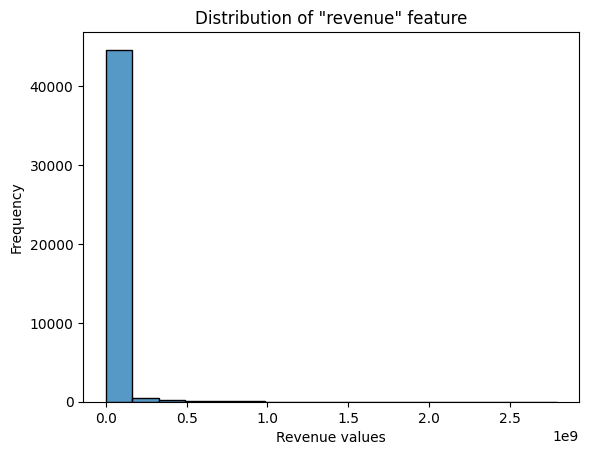

In [60]:
# View of the feature and its distribution

sns.histplot(movies["revenue"])

plt.title('Distribution of "revenue" feature')
plt.xlabel('Revenue values')
plt.ylabel('Frequency')
plt.show()

In [61]:
movies.revenue.value_counts()[0]#.sort_values(ascending= False)

# Lots of values in 0.

38058

In [62]:
movies.revenue.value_counts()[0]/movies.shape[0]

# Lots of revenue values with 0. Almost all values are 0 for this feature.

0.8370650596049796

In [63]:
# Filling null values of the budget column. 

print("The number of null values in the budget column are: ", movies.budget.isnull().sum())
movies["revenue"] = movies.revenue.fillna(0)

The number of null values in the budget column are:  0


In [64]:
# Check

movies.budget.isnull().sum()

0

In [65]:
# Nulls in release_date

print("The number of null values in the release_date column are: ", movies.release_date.isnull().sum())

The number of null values in the release_date column are:  87


In [66]:
# The null values in the 'release date' field should be removed.

print(" Records, before removal:", movies.shape[0])
movies = movies.dropna(subset= "release_date")
print(" Records, after removal:", movies.shape[0])

 Records, before removal: 45466
 Records, after removal: 45379


In [67]:
# If there are dates, they should be in the format YYYY-MM-DD, and a 'release_year' 
# column should be created to extract the release year from the release date."

movies.release_date

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45460    1991-05-13
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45379, dtype: object

In [68]:
# Convertion to desire format

movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d', errors='coerce')

# I extract the year of the date column
movies["release_year"] = movies['release_date'].dt.year

In [69]:
# Create the column for return on investment, named 'return,' by dividing the 'revenue' and 'budget' fields. 
# When there is no data available to calculate it, it should take the value 0."

movies[["budget", "revenue"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   45379 non-null  object 
 1   revenue  45379 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [70]:
# I change the data type to be able to run the calculation.

movies["budget"] = pd.to_numeric(movies["budget"], errors='coerce')

In [71]:
# Creation of the return, having the profit and the budget.

movies["return"] = movies["revenue"]/ movies["budget"]

In [72]:
# Filling nulls with 0 and very small values with nulls.

movies["return"] = movies["return"].replace([np.inf, -np.inf], np.nan)
movies["return"] = movies["return"].fillna(0)

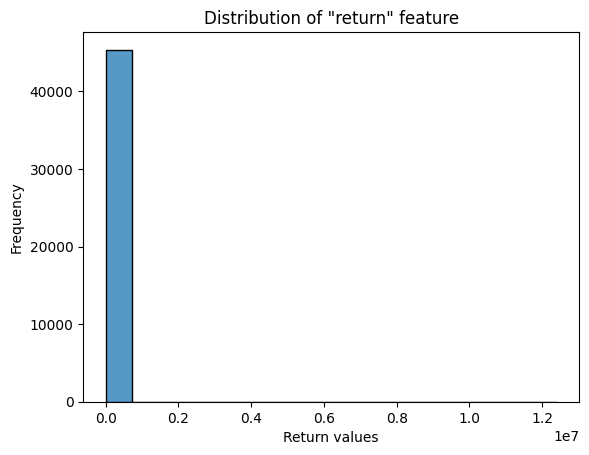

In [73]:
# Distribution of the new column. Many 0s, as expected.

sns.histplot(movies["return"])
plt.title('Distribution of "return" feature')
plt.xlabel('Return values')
plt.ylabel('Frequency')
plt.show()

In [74]:
# Remove the columns that will not be used: video, imdb_id, adult, original_title, poster_path, and homepage.

print("Before the deletion of columns, there were: ", movies.shape[1], " columns")
movies.drop(columns=["video", "imdb_id", "adult", "original_title", "poster_path_belongs_to_collection","homepage", "poster_path"], inplace=True)
print("After the deletion of these 7 columns, there are: ", movies.shape[1], " Columns")

Before the deletion of columns, there were:  39  columns
After the deletion of these 7 columns, there are:  32  Columns


#### CREDITS

In [75]:

# To check the large volume of data in this dataset, use...
# Show all columns
#pd.set_option('display.max_columns', None)
# Show the full column width
#pd.set_option('display.max_colwidth', None)

In [76]:
credits.head(2)

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   

                                                crew    id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...   862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...  8844

In [77]:
# I change the name of the column from id(movie) to id_original.
credits.rename(columns={'id':'id_original'}, inplace= True)

In [78]:
# I use ast.literal_eval() to evaluate and transform text strings representing dictionaries into actual dictionaries.

credits['crew'] = credits['crew'].apply(ast.literal_eval) 
credits.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew  id_original  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...          862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...         8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...        15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...        31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...        11862

In [79]:
# I create a df and apply function to extract the columns information. 

df_exploded = credits.explode('crew')

def extract_crew_info(x):
    if isinstance(x, dict):
        return pd.Series([x.get('credit_id', ''), x.get('department', ''),x.get('gender', ''),x.get('id', ''),x.get('job', ''),x.get('name', ''),x.get('profile_path', '')  ])
    else:
        return pd.Series(['', ''])

df_exploded[['credit_id', 'department', 'gender','id_crew','job', 'name', 'profile_path']] = df_exploded['crew'].apply(extract_crew_info) 


In [80]:
# Creation of df.

df_credits = credits.join(df_exploded[['credit_id', 'department', 'gender', 'id_crew', 'job', 'name', 'profile_path']]) 

In [81]:
# Remove columns that are considered unnecesary. 

df_credits.drop(columns=['crew','cast', 'credit_id','profile_path', 'gender'], inplace=True) 

In [82]:
# View of the first rows of the column unnested with its depth due to explode method.

df_credits.head()

id_original department  id_crew         job            name
0          862  Directing   7879.0    Director   John Lasseter
0          862    Writing  12891.0  Screenplay     Joss Whedon
0          862    Writing      7.0  Screenplay  Andrew Stanton
0          862    Writing  12892.0  Screenplay      Joel Cohen
0          862    Writing  12893.0  Screenplay    Alec Sokolow

In [83]:
# Convertion of the numeric columns to strings.

df_credits['id_crew'] = df_credits['id_crew'].astype(str)

df_credits['id_original'] = df_credits['id_original'].astype(str) 

In [84]:
# Count of directos. I can see that some movies can coun with more than 1 director.

director_result = df_credits[df_credits['job'] == 'Director']['job'].value_counts()
director_result 

Director    49048
Name: job, dtype: int64

In [85]:
# Filter to see only directors that is the information I want. 

df_director= df_credits[df_credits['job']== 'Director']
df_director.head()

id_original department  id_crew       job             name
0         862  Directing   7879.0  Director    John Lasseter
1        8844  Directing   4945.0  Director     Joe Johnston
2       15602  Directing  26502.0  Director    Howard Deutch
3       31357  Directing   2178.0  Director  Forest Whitaker
4       11862  Directing  56106.0  Director    Charles Shyer

In [86]:
#  Directors names

df_director["name"].unique()

array(['John Lasseter', 'Joe Johnston', 'Howard Deutch', ...,
       'Aaron Osborne', 'Hamid Nematollah', 'Daisy Asquith'], dtype=object)

In [87]:
# There are more director than movies. 8% more director than movies. 

df_director.shape[0]/movies.shape[0]

1.0808523766499922

In [88]:
# I create a subset to have the necessary information to later build the requested function.

df_m = movies[["title","id", "revenue", "release_date","budget","return"]] 
df_m

title      id      revenue release_date  \
0                        Toy Story     862  373554033.0   1995-10-30   
1                          Jumanji    8844  262797249.0   1995-12-15   
2                 Grumpier Old Men   15602          0.0   1995-12-22   
3                Waiting to Exhale   31357   81452156.0   1995-12-22   
4      Father of the Bride Part II   11862   76578911.0   1995-02-10   
...                            ...     ...          ...          ...   
45460                   Robin Hood   30840          0.0   1991-05-13   
45462          Century of Birthing  111109          0.0   2011-11-17   
45463                     Betrayal   67758          0.0   2003-08-01   
45464             Satan Triumphant  227506          0.0   1917-10-21   
45465                     Queerama  461257          0.0   2017-06-09   

           budget     return  
0      30000000.0  12.451801  
1      65000000.0   4.043035  
2             0.0   0.000000  
3      16000000.0   5.090760  
4             0.0   0.000000  
...           ...        ...  
45460         0.0   0.000000  
45462         0.0   0.000000  
45463         0.0   0.000000  
45464         0.0   0.000000  
45465         0.0   0.000000  

[45379 rows x 6 columns]

In [89]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         45376 non-null  object        
 1   id            45379 non-null  object        
 2   revenue       45379 non-null  float64       
 3   release_date  45376 non-null  datetime64[ns]
 4   budget        45376 non-null  float64       
 5   return        45379 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.4+ MB


In [90]:
# I define this subset to join it with the director.

df_m["revenue"] = pd.to_numeric(df_m["revenue"], errors='coerce')
df_m["budget"] = pd.to_numeric(df_m["budget"], errors='coerce')

df_m['ganancia'] = df_m["revenue"] - df_m["budget"]
df_m

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\2076034097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m["revenue"] = pd.to_numeric(df_m["revenue"], errors='coerce')
C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\2076034097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m["budget"] = pd.to_numeric(df_m["budget"], errors='coerce')
C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\2076034097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

title      id      revenue release_date  \
0                        Toy Story     862  373554033.0   1995-10-30   
1                          Jumanji    8844  262797249.0   1995-12-15   
2                 Grumpier Old Men   15602          0.0   1995-12-22   
3                Waiting to Exhale   31357   81452156.0   1995-12-22   
4      Father of the Bride Part II   11862   76578911.0   1995-02-10   
...                            ...     ...          ...          ...   
45460                   Robin Hood   30840          0.0   1991-05-13   
45462          Century of Birthing  111109          0.0   2011-11-17   
45463                     Betrayal   67758          0.0   2003-08-01   
45464             Satan Triumphant  227506          0.0   1917-10-21   
45465                     Queerama  461257          0.0   2017-06-09   

           budget     return     ganancia  
0      30000000.0  12.451801  343554033.0  
1      65000000.0   4.043035  197797249.0  
2             0.0   0.000000          0.0  
3      16000000.0   5.090760   65452156.0  
4             0.0   0.000000   76578911.0  
...           ...        ...          ...  
45460         0.0   0.000000          0.0  
45462         0.0   0.000000          0.0  
45463         0.0   0.000000          0.0  
45464         0.0   0.000000          0.0  
45465         0.0   0.000000          0.0  

[45379 rows x 7 columns]

In [91]:
# I merge the data to have the dataframe narrowed down with the information I need.

directors = pd.merge(df_m, df_director,left_on="id", right_on= "id_original")
directors

title      id      revenue release_date  \
0                        Toy Story     862  373554033.0   1995-10-30   
1                          Jumanji    8844  262797249.0   1995-12-15   
2                 Grumpier Old Men   15602          0.0   1995-12-22   
3                Waiting to Exhale   31357   81452156.0   1995-12-22   
4      Father of the Bride Part II   11862   76578911.0   1995-02-10   
...                            ...     ...          ...          ...   
49073                   Robin Hood   30840          0.0   1991-05-13   
49074          Century of Birthing  111109          0.0   2011-11-17   
49075                     Betrayal   67758          0.0   2003-08-01   
49076             Satan Triumphant  227506          0.0   1917-10-21   
49077                     Queerama  461257          0.0   2017-06-09   

           budget     return     ganancia id_original department    id_crew  \
0      30000000.0  12.451801  343554033.0         862  Directing     7879.0   
1      65000000.0   4.043035  197797249.0        8844  Directing     4945.0   
2             0.0   0.000000          0.0       15602  Directing    26502.0   
3      16000000.0   5.090760   65452156.0       31357  Directing     2178.0   
4             0.0   0.000000   76578911.0       11862  Directing    56106.0   
...           ...        ...          ...         ...        ...        ...   
49073         0.0   0.000000          0.0       30840  Directing    17784.0   
49074         0.0   0.000000          0.0      111109  Directing  1051381.0   
49075         0.0   0.000000          0.0       67758  Directing    67753.0   
49076         0.0   0.000000          0.0      227506  Directing  1085341.0   
49077         0.0   0.000000          0.0      461257  Directing  1344495.0   

            job              name  
0      Director     John Lasseter  
1      Director      Joe Johnston  
2      Director     Howard Deutch  
3      Director   Forest Whitaker  
4      Director     Charles Shyer  
...         ...               ...  
49073  Director        John Irvin  
49074  Director          Lav Diaz  
49075  Director    Mark L. Lester  
49076  Director  Yakov Protazanov  
49077  Director     Daisy Asquith  

[49078 rows x 12 columns]

In [92]:
# Drop to avoid duplicity of ids.

directors = directors.drop(columns= "id_original")

In [93]:
# Renaming columns.

directors = directors.rename(columns = {"name": "director_name", "budget":"cost"})
directors.head()

title     id      revenue release_date        cost  \
0                    Toy Story    862  373554033.0   1995-10-30  30000000.0   
1                      Jumanji   8844  262797249.0   1995-12-15  65000000.0   
2             Grumpier Old Men  15602          0.0   1995-12-22         0.0   
3            Waiting to Exhale  31357   81452156.0   1995-12-22  16000000.0   
4  Father of the Bride Part II  11862   76578911.0   1995-02-10         0.0   

      return     ganancia department  id_crew       job    director_name  
0  12.451801  343554033.0  Directing   7879.0  Director    John Lasseter  
1   4.043035  197797249.0  Directing   4945.0  Director     Joe Johnston  
2   0.000000          0.0  Directing  26502.0  Director    Howard Deutch  
3   5.090760   65452156.0  Directing   2178.0  Director  Forest Whitaker  
4   0.000000   76578911.0  Directing  56106.0  Director    Charles Shyer

#### CAST

In [94]:
# Now's the turn to unnest "cast". 

credits.cast

0        [{'cast_id': 14, 'character': 'Woody (voice)',...
1        [{'cast_id': 1, 'character': 'Alan Parrish', '...
2        [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3        [{'cast_id': 1, 'character': "Savannah 'Vannah...
4        [{'cast_id': 1, 'character': 'George Banks', '...
                               ...                        
45471    [{'cast_id': 0, 'character': '', 'credit_id': ...
45472    [{'cast_id': 1002, 'character': 'Sister Angela...
45473    [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...
45474    [{'cast_id': 2, 'character': '', 'credit_id': ...
45475                                                   []
Name: cast, Length: 45476, dtype: object

In [95]:
credits['cast'] = credits['cast'].apply(ast.literal_eval) 

In [96]:
exploded = credits.explode('cast')

def extract_cast_info(x):
    if isinstance(x, dict):
        return pd.Series([x.get('character', ''),x.get('name', '')])
    else:
        return pd.Series(['', ''])

exploded[[ 'name', 'character']] = exploded['cast'].apply(extract_cast_info) 

actors= exploded.drop(columns=['cast', 'crew'])

In [97]:
actors = actors.rename(columns = {"name": "character_name", "character":"actors_name"})
actors

id_original           character_name        actors_name
0              862            Woody (voice)          Tom Hanks
0              862   Buzz Lightyear (voice)          Tim Allen
0              862  Mr. Potato Head (voice)        Don Rickles
0              862       Slinky Dog (voice)         Jim Varney
0              862              Rex (voice)      Wallace Shawn
...            ...                      ...                ...
45474       227506                           Nathalie Lissenko
45474       227506                                Pavel Pavlov
45474       227506                           Aleksandr Chabrov
45474       227506                                 Vera Orlova
45475       461257                                            

[564892 rows x 3 columns]

In [98]:
actors_by_movie = actors.groupby('id_original').agg({'character_name': lambda x: "'" + "' '".join(x) + "'",
                                           'actors_name': lambda x: "'" + ', '.join(map(str, x)) + "'"}).reset_index(False)

actors_by_movie 

id_original                                     character_name  \
0                2  'Taisto Olavi Kasurinen' 'Irmeli Katariina Pih...   
1                3  'Nikander' 'Ilona Rajamäki' 'Melartin' 'Co-wor...   
2                5  'Ted the Bellhop' 'Man' 'Angela' 'Elspeth' 'Ma...   
3                6  'Frank Wyatt' 'Mike Peterson' 'Fallon' 'Ray Co...   
4               11  'Luke Skywalker' 'Han Solo' 'Princess Leia Org...   
...            ...                                                ...   
45427       465044  'Bozena' 'The Hive Queen' 'Melissa' 'The Docto...   
45428       467731  'Alec Beggs' 'Frank Doran' 'Raphael Infante' '...   
45429       468343                                                 ''   
45430       468707     'Satu' 'Heidi' 'Lauri' 'Henri' 'Ari' 'Viljami'   
45431       469172  'Manuel(7 years old)' 'Manuel's Mother' 'Manue...   

                                             actors_name  
0      'Turo Pajala, Susanna Haavisto, Matti Pellonpä...  
1      'Matti Pellonpää, Kati Outinen, Sakari Kuosman...  
2      'Tim Roth, Antonio Banderas, Jennifer Beals, M...  
3      'Emilio Estevez, Cuba Gooding Jr., Denis Leary...  
4      'Mark Hamill, Harrison Ford, Carrie Fisher, Pe...  
...                                                  ...  
45427  'Karolina Antosik, Amelie Leroy, Tessa McGinn,...  
45428  'Lloyd Bridges, Jack Warden, Rafael Campos, Ro...  
45429                                                 ''  
45430  'Inka Haapamäki, Rosa Honkonen, Tiitus Rantala...  
45431  'Ruben de Freitas, Teresa Madruga, Fernando He...  

[45432 rows x 3 columns]

#### FUNCTIONS DEFINITION

##### MOVIES_LANGUAGES

In [99]:
# Creating a DataFrame to search for the results.

movies_language = pd.DataFrame(movies.original_language.value_counts()).reset_index()
# Quantity of movies in their different languages. 
movies_language = movies_language.rename(columns ={"index": "country_code"})
movies_language



country_code  original_language
0            en              32202
1            fr               2437
2            it               1528
3            ja               1349
4            de               1078
..          ...                ...
87           zu                  1
88           qu                  1
89        104.0                  1
90           la                  1
91           si                  1

[92 rows x 2 columns]

In [100]:
# I see the unique values, where I notice some strange values.

movies.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, '104.0', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo',
       'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', '68.0', 'uz', 'sm', 'mt',
       '82.0', 'hy', 'iu', 'lb', 'si'], dtype=object)

In [101]:
# Watching these cases

# nan
movies[movies["original_language"]=="104.0"]
# Strange information, but seem like it needs to be erase. 
movies[movies["original_language"]=="68.0"]
# Also strange information
movies[movies["original_language"]=="82.0"]
# These seems like strange information, like moved from the columns o given by its input at origin as bad. 
# 

# These are the only three values that do not match with the constructed DataFrame of languages in the "spoken_language" column.

belongs_to_collection  budget  \
35587              2.185485     NaN   

                                                  genres          id  \
35587  {'name': 'Odyssey Media', 'id': 17161}, {'name...  2014-01-01   

      original_language  overview             popularity production_companies  \
35587              82.0  Released  Beware Of Frost Bites                False   

      production_countries release_date  ...                     ids_genre  \
35587                  4.3          NaT  ...  [17161, 18012, 18013, 23822]   

                                            genres_names production_companies  \
35587  [Odyssey Media, Pulser Productions, Rogue Stat...                False   

      ids_production_companies names_production_companies  \
35587                       []                         []   

      production_countries  iso_3166_1  production_countries_names  \
35587                  4.3          []                          []   

       release_year return  
35587           NaN    0.0  

[1 rows x 32 columns]

In [102]:
macthing_languages = pd.merge(movies["original_language"],df_language_exploded_concat,how= "inner", left_on = "original_language", right_on="iso_639_1" )
print(macthing_languages.shape[0])
print(movies.shape[0])

# The only three records that do not match with the country code in the "spoken_languages" 
# column are the ones containing numbers and appear to be unusual (those records have been dropped).

45376
45379


In [103]:
# I remove these inappropriate values.

movies = movies[movies["original_language"]!="82.0"]
movies = movies[movies["original_language"]!="68.0"]
movies = movies[movies["original_language"]!="104.0"]


In [104]:
# Check

movies.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [105]:
movies = movies.merge(df_language_exploded_concat, left_on = "original_language", right_on="iso_639_1", how='left')

movies.rename(columns= {"names": "language_name"}) 

belongs_to_collection      budget  \
0      {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1                                                   None  65000000.0   
2      {'id': 119050, 'name': 'Grumpy Old Men Collect...         0.0   
3                                                   None  16000000.0   
4      {'id': 96871, 'name': 'Father of the Bride Col...         0.0   
...                                                  ...         ...   
45371                                               None         0.0   
45372                                               None         0.0   
45373                                               None         0.0   
45374                                               None         0.0   
45375                                               None         0.0   

                                                  genres      id  \
0      {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...     862   
1      {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...    8844   
2      {'id': 10749, 'name': 'Romance'}, {'id': 35, '...   15602   
3      {'id': 35, 'name': 'Comedy'}, {'id': 18, 'name...   31357   
4                           {'id': 35, 'name': 'Comedy'}   11862   
...                                                  ...     ...   
45371  {'id': 18, 'name': 'Drama'}, {'id': 28, 'name'...   30840   
45372                        {'id': 18, 'name': 'Drama'}  111109   
45373  {'id': 28, 'name': 'Action'}, {'id': 18, 'name...   67758   
45374                                                     227506   
45375                                                     461257   

      original_language                                           overview  \
0                    en  Led by Woody, Andy's toys live happily in his ...   
1                    en  When siblings Judy and Peter discover an encha...   
2                    en  A family wedding reignites the ancient feud be...   
3                    en  Cheated on, mistreated and stepped on, the wom...   
4                    en  Just when George Banks has recovered from his ...   
...                 ...                                                ...   
45371                en  Yet another version of the classic epic, with ...   
45372                tl  An artist struggles to finish his work while a...   
45373                en  When one of her hits goes wrong, a professiona...   
45374                en  In a small town live two brothers, one a minis...   
45375                en  50 years after decriminalisation of homosexual...   

      popularity                               production_companies  \
0      21.946943       {'name': 'Pixar Animation Studios', 'id': 3}   
1      17.015539  {'name': 'TriStar Pictures', 'id': 559}, {'nam...   
2        11.7129  {'name': 'Warner Bros.', 'id': 6194}, {'name':...   
3       3.859495  {'name': 'Twentieth Century Fox Film Corporati...   
4       8.387519  {'name': 'Sandollar Productions', 'id': 5842},...   
...          ...                                                ...   
45371   5.683753  {'name': 'Westdeutscher Rundfunk (WDR)', 'id':...   
45372   0.178241               {'name': 'Sine Olivia', 'id': 19653}   
45373   0.903007    {'name': 'American World Pictures', 'id': 6165}   
45374   0.003503                 {'name': 'Yermoliev', 'id': 88753}   
45375   0.163015                                                      

                                    production_countries release_date  ...  \
0      {'iso_3166_1': 'US', 'name': 'United States of...   1995-10-30  ...   
1      {'iso_3166_1': 'US', 'name': 'United States of...   1995-12-15  ...   
2      {'iso_3166_1': 'US', 'name': 'United States of...   1995-12-22  ...   
3      {'iso_3166_1': 'US', 'name': 'United States of...   1995-12-22  ...   
4      {'iso_3166_1': 'US', 'name': 'United States of...   1995-02-10  ...   
...                                                  ...          ...  ...   
45371  {'iso_3166

In [106]:
movies.shape

(45376, 34)

In [107]:
# Removal of unwanted values. 

movies_language = movies_language[movies_language["country_code"]!="82.0"]
movies_language = movies_language[movies_language["country_code"]!="68.0"]
movies_language = movies_language[movies_language["country_code"]!="104.0"]
movies_language

country_code  original_language
0            en              32202
1            fr               2437
2            it               1528
3            ja               1349
4            de               1078
..          ...                ...
86           jv                  1
87           zu                  1
88           qu                  1
90           la                  1
91           si                  1

[89 rows x 2 columns]

In [108]:
# Definition of the function with the dataframe seen before. 

def movies_languages(languages:str):
    '''Input the language, and It will return the number of movies produced in that language.'''
    languages = languages.lower()
    languages = str(languages)
    if languages in movies_language["country_code"].values:
        count = movies['original_language'].value_counts().get(languages, 0)
        return {'languages':languages, 'cantidad':count}

    else: 
        return { "message":"Incorrect language code entered."}
    


In [109]:
# Test of function.

language = "en"
movies_languages(language)

{'languages': 'en', 'cantidad': 32202}

In [110]:
# Proof that it works with an error.

movies_languages("as")

{'message': 'Incorrect language code entered.'}

In [111]:
movies_language.info()

# from int i'll pass it to float for the API to run. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 91
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country_code       89 non-null     object
 1   original_language  89 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [112]:
movies_language["original_language"] = movies_language["original_language"].astype(float)
movies_language

country_code  original_language
0            en            32202.0
1            fr             2437.0
2            it             1528.0
3            ja             1349.0
4            de             1078.0
..          ...                ...
86           jv                1.0
87           zu                1.0
88           qu                1.0
90           la                1.0
91           si                1.0

[89 rows x 2 columns]

In [113]:
# I export the filtered dataframe to CSV in order to generate a smaller and more efficient file for querying the specific function.

movies_language.to_csv("movies_language.csv", index = False)

#### MOVIES DURATION

In [114]:
# I reduce the data to make it smaller, for performing the creation of the function.

duration_of_movies_df = movies[["title","release_year", "runtime"]]
duration_of_movies_df[duration_of_movies_df["title"]=="Jumanji"].runtime

1    104.0
Name: runtime, dtype: float64

In [115]:
# Simulation of the function, to test what the endpoint requires.

movie = "Jumanji"
movies_info = movies[movies["title"]== movie].title.values
print(movies_info)
duration = movies[movies["title"]== movie].runtime.values
print(duration)
year_m = movies[movies["title"]== movie].release_year.values
print(year_m)


['Jumanji']
[104.]
[1995.]


In [116]:
# Creation of function similar as seen previously.

def movies_duration(movie:str):
    '''Enter the movie, and this endpoint will return the duration and the year of the movie.'''
    movie = movie.lower().title()
    movie = str(movie)
    if movie in movies["title"].values:
        
        movies_info = movies[movies["title"]== movie].title.values[0]
        duration = movies[movies["title"]== movie].runtime.values[0]
        year_m = movies[movies["title"]== movie].release_year.values[0]
        return {'movie':movies_info, 'duration':duration, 'year':year_m}

    else:
        return "We are sorry! The movie you are seeking doesn't have the information requested"   
    

In [117]:
# Test that the function works correctly

movies_duration("jUmanji")

{'movie': 'Jumanji', 'duration': 104.0, 'year': 1995.0}

In [118]:
# Testing with an incorrect value

movies_duration("Soy Henry")

"We are sorry! The movie you are seeking doesn't have the information requested"

In [119]:
# Export to csv, to make the function more efficient.

duration_of_movies_df.to_csv("Duration_of_movies.csv", index = False)

#### SUCCESFUL PRODUCTION COMPANIES

In [120]:
# I iterate and count all the times each production company was involved in the creation of movies.

movies_exploded = movies.apply(lambda x: pd.Series(x['names_production_companies']), axis=1).stack().reset_index(level=1, drop=True).to_frame('names_production_companies')

movies_counts = movies_exploded['names_production_companies'].value_counts().reset_index()
movies_counts.columns = ['Production_Company', 'Movie_Count']

movies_counts

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\1403587959.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  movies_exploded = movies.apply(lambda x: pd.Series(x['names_production_companies']), axis=1).stack().reset_index(level=1, drop=True).to_frame('names_production_companies')


Production_Company  Movie_Count
0                                Warner Bros.         1250
1                   Metro-Goldwyn-Mayer (MGM)         1076
2                          Paramount Pictures         1003
3      Twentieth Century Fox Film Corporation          836
4                          Universal Pictures          830
...                                       ...          ...
23528                   Arts Council of Wales            1
23529                      Straight Talk, Inc            1
23530         North American Film Enterprises            1
23531                    Ice Cold Productions            1
23532                               Yermoliev            1

[23533 rows x 2 columns]

In [121]:
# Extraction of the revenue of the production companies.

movies_exploded = movies.apply(lambda x: pd.Series(x['names_production_companies']), axis=1).stack().reset_index(level=1, drop=True).to_frame('names_production_companies').join(movies[['revenue']])
movies_grouped = movies_exploded.groupby('names_production_companies')['revenue'].sum().reset_index()
movies_grouped

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\863176592.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  movies_exploded = movies.apply(lambda x: pd.Series(x['names_production_companies']), axis=1).stack().reset_index(level=1, drop=True).to_frame('names_production_companies').join(movies[['revenue']])


names_production_companies     revenue
0      "DIA" Productions GmbH & Co. KG  44350926.0
1        # Andrea Sperling Productions         0.0
2                  # Lexyn Productions         0.0
3             'A' Production Committee         0.0
4                             (주)로드픽쳐스         0.0
...                                ...         ...
23528                            영화사 집         0.0
23529                            이디오플랜         0.0
23530                            인벤트 디         0.0
23531                          타임스토리그룹         0.0
23532                            프로덕션M         0.0

[23533 rows x 2 columns]

In [122]:
# I sort the dataframe to review and assess the coherence of the data. The large and well-known production companies are visible.

movies_grouped.sort_values(by= "revenue", ascending= False)
# movies_grouped[movies_grouped["names_production_companies"]=="# Lexyn Productions"]

names_production_companies       revenue
22482                            Warner Bros.  6.352519e+10
21855                      Universal Pictures  5.525919e+10
15709                      Paramount Pictures  4.880819e+10
21557  Twentieth Century Fox Film Corporation  4.768775e+10
22443                    Walt Disney Pictures  4.083727e+10
...                                       ...           ...
9123                             Gémini Films  0.000000e+00
9121                               Gädda Five  0.000000e+00
9120                             Gávea Filmes  0.000000e+00
9119                       Gynormous Pictures  0.000000e+00
23532                                   프로덕션M  0.000000e+00

[23533 rows x 2 columns]

In [123]:
# I create the narrowed-down dataframe by joining the subqueries performed earlier to develop the function.

succesful_production_companies = pd.merge(movies_counts,movies_grouped, left_on= "Production_Company", right_on="names_production_companies")
succesful_production_companies["Average_profit_per_company"] = round(succesful_production_companies["revenue"]/succesful_production_companies["Movie_Count"],2)
succesful_production_companies

Production_Company  Movie_Count  \
0                                Warner Bros.         1250   
1                   Metro-Goldwyn-Mayer (MGM)         1076   
2                          Paramount Pictures         1003   
3      Twentieth Century Fox Film Corporation          836   
4                          Universal Pictures          830   
...                                       ...          ...   
23528                   Arts Council of Wales            1   
23529                      Straight Talk, Inc            1   
23530         North American Film Enterprises            1   
23531                    Ice Cold Productions            1   
23532                               Yermoliev            1   

                   names_production_companies       revenue  \
0                                Warner Bros.  6.352519e+10   
1                   Metro-Goldwyn-Mayer (MGM)  1.237679e+10   
2                          Paramount Pictures  4.880819e+10   
3      Twentieth Century Fox Film Corporation  4.768775e+10   
4                          Universal Pictures  5.525919e+10   
...                                       ...           ...   
23528                   Arts Council of Wales  4.635200e+04   
23529                      Straight Talk, Inc  0.000000e+00   
23530         North American Film Enterprises  0.000000e+00   
23531                    Ice Cold Productions  0.000000e+00   
23532                               Yermoliev  0.000000e+00   

       Average_profit_per_company  
0                     50820149.82  
1                     11502593.00  
2                     48662206.30  
3                     57042758.77  
4                     66577337.84  
...                           ...  
23528                    46352.00  
23529                        0.00  
23530                        0.00  
23531                        0.00  
23532                        0.00  

[23533 rows x 5 columns]

In [124]:
# Drop of unneccesarry column

succesful_production_companies = succesful_production_companies.drop(columns= "names_production_companies" )
succesful_production_companies.head(2)

Production_Company  Movie_Count       revenue  \
0               Warner Bros.         1250  6.352519e+10   
1  Metro-Goldwyn-Mayer (MGM)         1076  1.237679e+10   

   Average_profit_per_company  
0                 50820149.82  
1                 11502593.00

In [125]:
# I export to CSV to streamline the function's subsequent query.

succesful_production_companies.to_csv("Succesful_companies.csv", index = False)

In [126]:
def succesful_companies(company:str):
    '''You enter the franchise, returning the number of movies, total revenue, and average'''

    company = str(company)
    if company in succesful_production_companies["Production_Company"].values:
        
        company_name = succesful_production_companies[succesful_production_companies["Production_Company"]== company].Production_Company.values[0]
        amount_of_movies = succesful_production_companies[succesful_production_companies["Production_Company"]== company].Movie_Count.values[0]
        total_revenue = succesful_production_companies[succesful_production_companies["Production_Company"]== company].revenue.values[0]
        
        
        return {'Production_company':company_name, 'Quantity':amount_of_movies, 'revenue_total':total_revenue}
        
    else:
        return "We are sorry! The company searched for does not have the information requested" 

    

In [127]:
# Test with a true value

succesful_companies("Warner Bros.")

{'Production_company': 'Warner Bros.',
 'Quantity': 1250,
 'revenue_total': 63525187272.0}

In [128]:
# Test with a wrong value

succesful_companies("Soy Henry")

'We are sorry! The company searched for does not have the information requested'

#### MOVIE COUNTRY

In [129]:
#movies.columns
movies.production_countries

production_countries  \
0      {'iso_3166_1': 'US', 'name': 'United States of...   
1      {'iso_3166_1': 'US', 'name': 'United States of...   
2      {'iso_3166_1': 'US', 'name': 'United States of...   
3      {'iso_3166_1': 'US', 'name': 'United States of...   
4      {'iso_3166_1': 'US', 'name': 'United States of...   
...                                                  ...   
45371  {'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_...   
45372        {'iso_3166_1': 'PH', 'name': 'Philippines'}   
45373  {'iso_3166_1': 'US', 'name': 'United States of...   
45374             {'iso_3166_1': 'RU', 'name': 'Russia'}   
45375     {'iso_3166_1': 'GB', 'name': 'United Kingdom'}   

                                    production_countries  
0      {'iso_3166_1': 'US', 'name': 'United States of...  
1      {'iso_3166_1': 'US', 'name': 'United States of...  
2      {'iso_3166_1': 'US', 'name': 'United States of...  
3      {'iso_3166_1': 'US', 'name': 'United States of...  
4      {'iso_3166_1': 'US', 'name': 'United States of...  
...                                                  ...  
45371  {'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_...  
45372        {'iso_3166_1': 'PH', 'name': 'Philippines'}  
45373  {'iso_3166_1': 'US', 'name': 'United States of...  
45374             {'iso_3166_1': 'RU', 'name': 'Russia'}  
45375     {'iso_3166_1': 'GB', 'name': 'United Kingdom'}  

[45376 rows x 2 columns]

In [130]:
# Same process as before, but in this case to count the countries producing movies.

countries_exploded = movies.apply(lambda x: pd.Series(x['production_countries_names']), axis=1).stack().reset_index(level=1, drop=True).to_frame('production_countries_names')

countries_counts = countries_exploded['production_countries_names'].value_counts().reset_index()
countries_counts.columns = ['production_countries_names', 'Movie_Count']

countries_counts

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\1473728760.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  countries_exploded = movies.apply(lambda x: pd.Series(x['production_countries_names']), axis=1).stack().reset_index(level=1, drop=True).to_frame('production_countries_names')


production_countries_names  Movie_Count
0     United States of America        21147
1               United Kingdom         4091
2                       France         3939
3                      Germany         2254
4                        Italy         2168
..                         ...          ...
155                 Madagascar            1
156                    Somalia            1
157                     Kuwait            1
158                 Martinique            1
159                     Guinea            1

[160 rows x 2 columns]

In [131]:
def movie_country( country: str ): 
    """
    You enter a country (as they are written in the dataset, no need to translate them!), 
    returning the number of movies produced in it.
    Example of return: X movies were produced in country X.
    """
    country = str(country)
    if country in countries_counts["production_countries_names"].values:
        
        country_name = countries_counts[countries_counts["production_countries_names"]== country].production_countries_names.values[0]
        count_countries = countries_counts[countries_counts["production_countries_names"]== country].Movie_Count.values[0]

        return {'country':country_name, 'Quantity':count_countries}

    else:

        return "We are sorry! The country you are looking for didn't produce movies"
        



In [132]:
# Correct test

movie_country ("Argentina")

{'country': 'Argentina', 'Quantity': 254}

In [133]:
# Wrong test

movie_country("Soy Henry")

"We are sorry! The country you are looking for didn't produce movies"

In [134]:
# I export CSV for the function in the API.

countries_counts.to_csv("countries_with_movies.csv", index = False)

#### FRANCHISES

In [135]:
#movies.columns
movies.name_belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
45371                               NaN
45372                               NaN
45373                               NaN
45374                               NaN
45375                               NaN
Name: name_belongs_to_collection, Length: 45376, dtype: object

In [136]:
# Same process, but in this case counting the movie franchises.

franchise_exploded = movies.apply(lambda x: pd.Series(x['name_belongs_to_collection']), axis=1).stack().reset_index(level=1, drop=True).to_frame('name_belongs_to_collection')

franchise_counts = franchise_exploded['name_belongs_to_collection'].value_counts().reset_index()
franchise_counts.columns = ['Franchise', 'Movie_Count']

franchise_counts

Franchise  Movie_Count
0                   The Bowery Boys           29
1                   Totò Collection           27
2             James Bond Collection           26
3     Zatôichi: The Blind Swordsman           26
4           The Carry On Collection           25
...                             ...          ...
1690         Glass Tiger collection            1
1691    Kathleen Madigan Collection            1
1692             The Big Bottom Box            1
1693               Joséphine - Saga            1
1694           Red Lotus Collection            1

[1695 rows x 2 columns]

In [137]:
franchised_exploded = movies.apply(lambda x: pd.Series(x['name_belongs_to_collection']), axis=1).stack().reset_index(level=1, drop=True).to_frame('name_belongs_to_collection').join(movies[['revenue']])

franchised_grouped = franchised_exploded.groupby('name_belongs_to_collection')['revenue'].sum().reset_index()

franchised_grouped.sort_values( by="revenue", ascending = False)

name_belongs_to_collection       revenue
552                Harry Potter Collection  7.707367e+09
1160                  Star Wars Collection  7.434495e+09
646                  James Bond Collection  7.106970e+09
1317   The Fast and the Furious Collection  5.125099e+09
968    Pirates of the Caribbean Collection  4.521577e+09
...                                    ...           ...
743   Les Mystères de l'ouest (Collection)  0.000000e+00
742                    Les Charlots - Saga  0.000000e+00
741                               Les Boys  0.000000e+00
739           Leningrad Cowboys Collection  0.000000e+00
1694                                식객 시리즈  0.000000e+00

[1695 rows x 2 columns]

In [138]:
# Joining the dataframes to obtain the information required by the function.

merge_franchises = pd.merge(franchise_counts,franchised_grouped, left_on= "Franchise", right_on="name_belongs_to_collection")
merge_franchises["average_revenue_franchise"] = round(franchised_grouped["revenue"]/franchise_counts["Movie_Count"],2)
merge_franchises

Franchise  Movie_Count  \
0                   The Bowery Boys           29   
1                   Totò Collection           27   
2             James Bond Collection           26   
3     Zatôichi: The Blind Swordsman           26   
4           The Carry On Collection           25   
...                             ...          ...   
1690         Glass Tiger collection            1   
1691    Kathleen Madigan Collection            1   
1692             The Big Bottom Box            1   
1693               Joséphine - Saga            1   
1694           Red Lotus Collection            1   

         name_belongs_to_collection       revenue  average_revenue_franchise  
0                   The Bowery Boys  0.000000e+00                12647589.21  
1                   Totò Collection  0.000000e+00                       0.00  
2             James Bond Collection  7.106970e+09                       0.00  
3     Zatôichi: The Blind Swordsman  0.000000e+00                       0.00  
4           The Carry On Collection  0.000000e+00                 8635200.56  
...                             ...           ...                        ...  
1690         Glass Tiger collection  0.000000e+00                       0.00  
1691    Kathleen Madigan Collection  0.000000e+00                       0.00  
1692             The Big Bottom Box  0.000000e+00                       0.00  
1693               Joséphine - Saga  0.000000e+00                       0.00  
1694           Red Lotus Collection  0.000000e+00                       0.00  

[1695 rows x 5 columns]

In [139]:
# Drop unneccesary column.

merge_franchises = merge_franchises.drop(columns= "name_belongs_to_collection" )
merge_franchises.head(2)

Franchise  Movie_Count  revenue  average_revenue_franchise
0  The Bowery Boys           29      0.0                12647589.21
1  Totò Collection           27      0.0                       0.00

In [140]:
def franchises_function(franchise:str):

    '''
    When you enter the franchise, the function will return the number of movies, the total earnings, and the average.
    '''
    
    franchise = str(franchise)
    if franchise in merge_franchises["Franchise"].values:
        
        franchise_name = merge_franchises[merge_franchises["Franchise"]== franchise].Franchise.values[0]
        amount_franchises = merge_franchises[merge_franchises["Franchise"]== franchise].Movie_Count.values[0]
        profit_total_franchise = merge_franchises[merge_franchises["Franchise"]== franchise].revenue.values[0]
        average_profit_franchise = merge_franchises[merge_franchises["Franchise"]== franchise].average_revenue_franchise.values[0]
        
        
        return {'franchise':franchise_name, 'quantity':amount_franchises, 'total_profit':profit_total_franchise, 'average_profit':average_profit_franchise}
        
    else:
        return "We are sorry! The franchise you are looking for does not have any information"

In [141]:
# Correct test

franchises_function("The Bowery Boys")

{'franchise': 'The Bowery Boys',
 'quantity': 29,
 'total_profit': 0.0,
 'average_profit': 12647589.21}

In [142]:
# Wrong test

franchises_function("Soy Henry")

'We are sorry! The franchise you are looking for does not have any information'

In [143]:
# I export the narrowed-down dataframe to a CSV.

merge_franchises.to_csv("franchises.csv", index = False)

#### DIRECTOR

In [144]:
# I take the dataframe created previously for building the function.

directors.head()

title     id      revenue release_date        cost  \
0                    Toy Story    862  373554033.0   1995-10-30  30000000.0   
1                      Jumanji   8844  262797249.0   1995-12-15  65000000.0   
2             Grumpier Old Men  15602          0.0   1995-12-22         0.0   
3            Waiting to Exhale  31357   81452156.0   1995-12-22  16000000.0   
4  Father of the Bride Part II  11862   76578911.0   1995-02-10         0.0   

      return     ganancia department  id_crew       job    director_name  
0  12.451801  343554033.0  Directing   7879.0  Director    John Lasseter  
1   4.043035  197797249.0  Directing   4945.0  Director     Joe Johnston  
2   0.000000          0.0  Directing  26502.0  Director    Howard Deutch  
3   5.090760   65452156.0  Directing   2178.0  Director  Forest Whitaker  
4   0.000000   76578911.0  Directing  56106.0  Director    Charles Shyer

In [145]:
directors["director_name"] = directors["director_name"].to_list()

In [146]:
directors["director_name"].unique()

array(['John Lasseter', 'Joe Johnston', 'Howard Deutch', ...,
       'Shanra J. Kehl', 'Aaron Osborne', 'Daisy Asquith'], dtype=object)

In [147]:
# Testing the fucntion
# directors_name = 'John Lasseter'
# directors_movies = directores[directores['director_name'] == nombre_director]
directors["director_name"].iloc[0] #"'John Lasseter'"

'John Lasseter'

In [148]:
directors

title      id      revenue release_date  \
0                        Toy Story     862  373554033.0   1995-10-30   
1                          Jumanji    8844  262797249.0   1995-12-15   
2                 Grumpier Old Men   15602          0.0   1995-12-22   
3                Waiting to Exhale   31357   81452156.0   1995-12-22   
4      Father of the Bride Part II   11862   76578911.0   1995-02-10   
...                            ...     ...          ...          ...   
49073                   Robin Hood   30840          0.0   1991-05-13   
49074          Century of Birthing  111109          0.0   2011-11-17   
49075                     Betrayal   67758          0.0   2003-08-01   
49076             Satan Triumphant  227506          0.0   1917-10-21   
49077                     Queerama  461257          0.0   2017-06-09   

             cost     return     ganancia department    id_crew       job  \
0      30000000.0  12.451801  343554033.0  Directing     7879.0  Director   
1      65000000.0   4.043035  197797249.0  Directing     4945.0  Director   
2             0.0   0.000000          0.0  Directing    26502.0  Director   
3      16000000.0   5.090760   65452156.0  Directing     2178.0  Director   
4             0.0   0.000000   76578911.0  Directing    56106.0  Director   
...           ...        ...          ...        ...        ...       ...   
49073         0.0   0.000000          0.0  Directing    17784.0  Director   
49074         0.0   0.000000          0.0  Directing  1051381.0  Director   
49075         0.0   0.000000          0.0  Directing    67753.0  Director   
49076         0.0   0.000000          0.0  Directing  1085341.0  Director   
49077         0.0   0.000000          0.0  Directing  1344495.0  Director   

          director_name  
0         John Lasseter  
1          Joe Johnston  
2         Howard Deutch  
3       Forest Whitaker  
4         Charles Shyer  
...                 ...  
49073        John Irvin  
49074          Lav Diaz  
49075    Mark L. Lester  
49076  Yakov Protazanov  
49077     Daisy Asquith  

[49078 rows x 11 columns]

In [149]:
def get_director(director_name):
    
    """
    You enter the name of a director that is within a dataset, and it should return their success measured through the return. 
    Additionally, it should return the name of each movie with its release date, 
    individual return, cost, and revenue in a list format."
    """ 

    # Filter the DataFrame to obtain the movies directed by the given director.
    director_movies = directors[directors['director_name'] == director_name]
    
    # Verify if the director is in the DataFrame.
    if director_movies.empty:
        return None  # Or a message that indicates the director wasn't found
        
    # Calculate the director's success by summing the individual returns of their movies
    director_total_revenue = director_movies['return'].sum()
    
    # Create a list of dictionaries with the details for each movie

    movies = []
    for index, row in director_movies.iterrows():
        movies_info = {
            'name': row['title'],
            'year': row['release_date'],
            'movies_return': row['return'],
            'movies_budget': row['cost'],
            'movies_revenue': row['revenue']
        }
        movies.append(movies_info)
    
    # Dictionary for the answer
    answer = {
        'director': director_name,
        'directors_total_revenue': director_total_revenue,
        'movies': movies
    }
    
    return answer

In [150]:
# Testing the function

get_director('John Lasseter')

{'director': 'John Lasseter',
 'directors_total_revenue': 27.65437835777778,
 'movies': [{'name': 'Toy Story',
   'year': Timestamp('1995-10-30 00:00:00'),
   'movies_return': 12.4518011,
   'movies_budget': 30000000.0,
   'movies_revenue': 373554033.0},
  {'name': "A Bug's Life",
   'year': Timestamp('1998-11-25 00:00:00'),
   'movies_return': 3.0271571583333334,
   'movies_budget': 120000000.0,
   'movies_revenue': 363258859.0},
  {'name': 'Toy Story 2',
   'year': Timestamp('1999-10-30 00:00:00'),
   'movies_return': 5.526298544444445,
   'movies_budget': 90000000.0,
   'movies_revenue': 497366869.0},
  {'name': 'Luxo Jr.',
   'year': Timestamp('1986-08-17 00:00:00'),
   'movies_return': 0.0,
   'movies_budget': 0.0,
   'movies_revenue': 0.0},
  {'name': 'Cars',
   'year': Timestamp('2006-06-08 00:00:00'),
   'movies_return': 3.849859575,
   'movies_budget': 120000000.0,
   'movies_revenue': 461983149.0},
  {'name': 'Cars 2',
   'year': Timestamp('2011-06-11 00:00:00'),
   'movies_r

In [151]:
# Narrowed csv for the function.

directors.to_csv("directors.csv", index = False)

##### VALORES FALTANTES

In [152]:
# Before conducting the Exploratory Data Analysis (EDA), I will join the dataframes we have to analyze 
# and extract the information from a single dataframe

movies.shape

(45376, 34)

In [153]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45375
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   belongs_to_collection                4488 non-null   object        
 1   budget                               45376 non-null  float64       
 2   genres                               45376 non-null  object        
 3   id                                   45376 non-null  object        
 4   original_language                    45365 non-null  object        
 5   overview                             44435 non-null  object        
 6   popularity                           45376 non-null  object        
 7   production_companies                 45376 non-null  object        
 8   production_countries                 45376 non-null  object        
 9   release_date                         45376 non-null  datetime64[ns]
 10  revenue   

In [154]:
# I want to bring the principal director of each movie

directors.drop_duplicates(subset='id', inplace=True)

In [155]:
directors.shape

(44510, 11)

In [156]:
# Merging dataframes for making one only to make the EDA

df = pd.merge(movies,directors)

In [157]:
actors_by_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_original     45432 non-null  int64 
 1   character_name  45432 non-null  object
 2   actors_name     45432 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [158]:
# Tansform feature to str so I can join dataframes

actors_by_movie['id_original'] = actors_by_movie['id_original'].astype(str) 

In [159]:
# Join dataframes and check if they merged correctly

df = pd.merge(df,actors_by_movie, left_on="id", right_on="id_original")
df= df.drop(columns = "id_original")
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_belongs_to_collection', 'name_belongs_to_collection',
       'backdrop_path_belongs_to_collection', 'genres', 'ids_genre',
       'genres_names', 'production_companies', 'ids_production_companies',
       'names_production_companies', 'production_countries', 'iso_3166_1',
       'production_countries_names', 'release_year', 'return', 'iso_639_1',
       'names', 'cost', 'ganancia', 'department', 'id_crew', 'job',
       'director_name', 'character_name', 'actors_name'],
      dtype='object')

Before conducting the Exploratory Data Analysis (EDA), it seems appropriate to inspect, analyze, and take necessary actions regarding missing values in the dataset.

In [160]:
# Checking for null values and the percentage that they represent in the whole dataframe

nulls_movies = pd.DataFrame(df.isnull().sum().sort_values(ascending = False))
nulls_movies["Nulls percentage"] = round(nulls_movies/df.shape[0]*100,2)
nulls_movies.rename(columns = {0:"Number of nulls"})

Number of nulls  Nulls percentage
backdrop_path_belongs_to_collection            41304             92.73
belongs_to_collection                          40087             90.00
name_belongs_to_collection                     40087             90.00
id_belongs_to_collection                       40087             90.00
tagline                                        24320             54.60
overview                                         869              1.95
runtime                                          211              0.47
status                                            61              0.14
iso_639_1                                         11              0.02
names                                             11              0.02
original_language                                 11              0.02
cost                                               0              0.00
ganancia                                           0              0.00
ids_production_companies                           0              0.00
department                                         0              0.00
id_crew                                            0              0.00
job                                                0              0.00
return                                             0              0.00
release_year                                       0              0.00
director_name                                      0              0.00
character_name                                     0              0.00
production_countries_names                         0              0.00
iso_3166_1                                         0              0.00
production_countries                               0              0.00
names_production_companies                         0              0.00
genres                                             0              0.00
production_companies                               0              0.00
genres_names                                       0              0.00
ids_genre                                          0              0.00
budget                                             0              0.00
vote_count                                         0              0.00
vote_average                                       0              0.00
title                                              0              0.00
spoken_languages                                   0              0.00
revenue                                            0              0.00
release_date                                       0              0.00
production_countries                               0              0.00
production_companies                               0              0.00
popularity                                         0              0.00
id                                                 0              0.00
genres                                             0              0.00
actors_name                                        0              0.00

In [161]:
# Drop of extra columns

df.drop(columns=["cost", "department", "id_crew", "job"], inplace=True)

<Axes: >

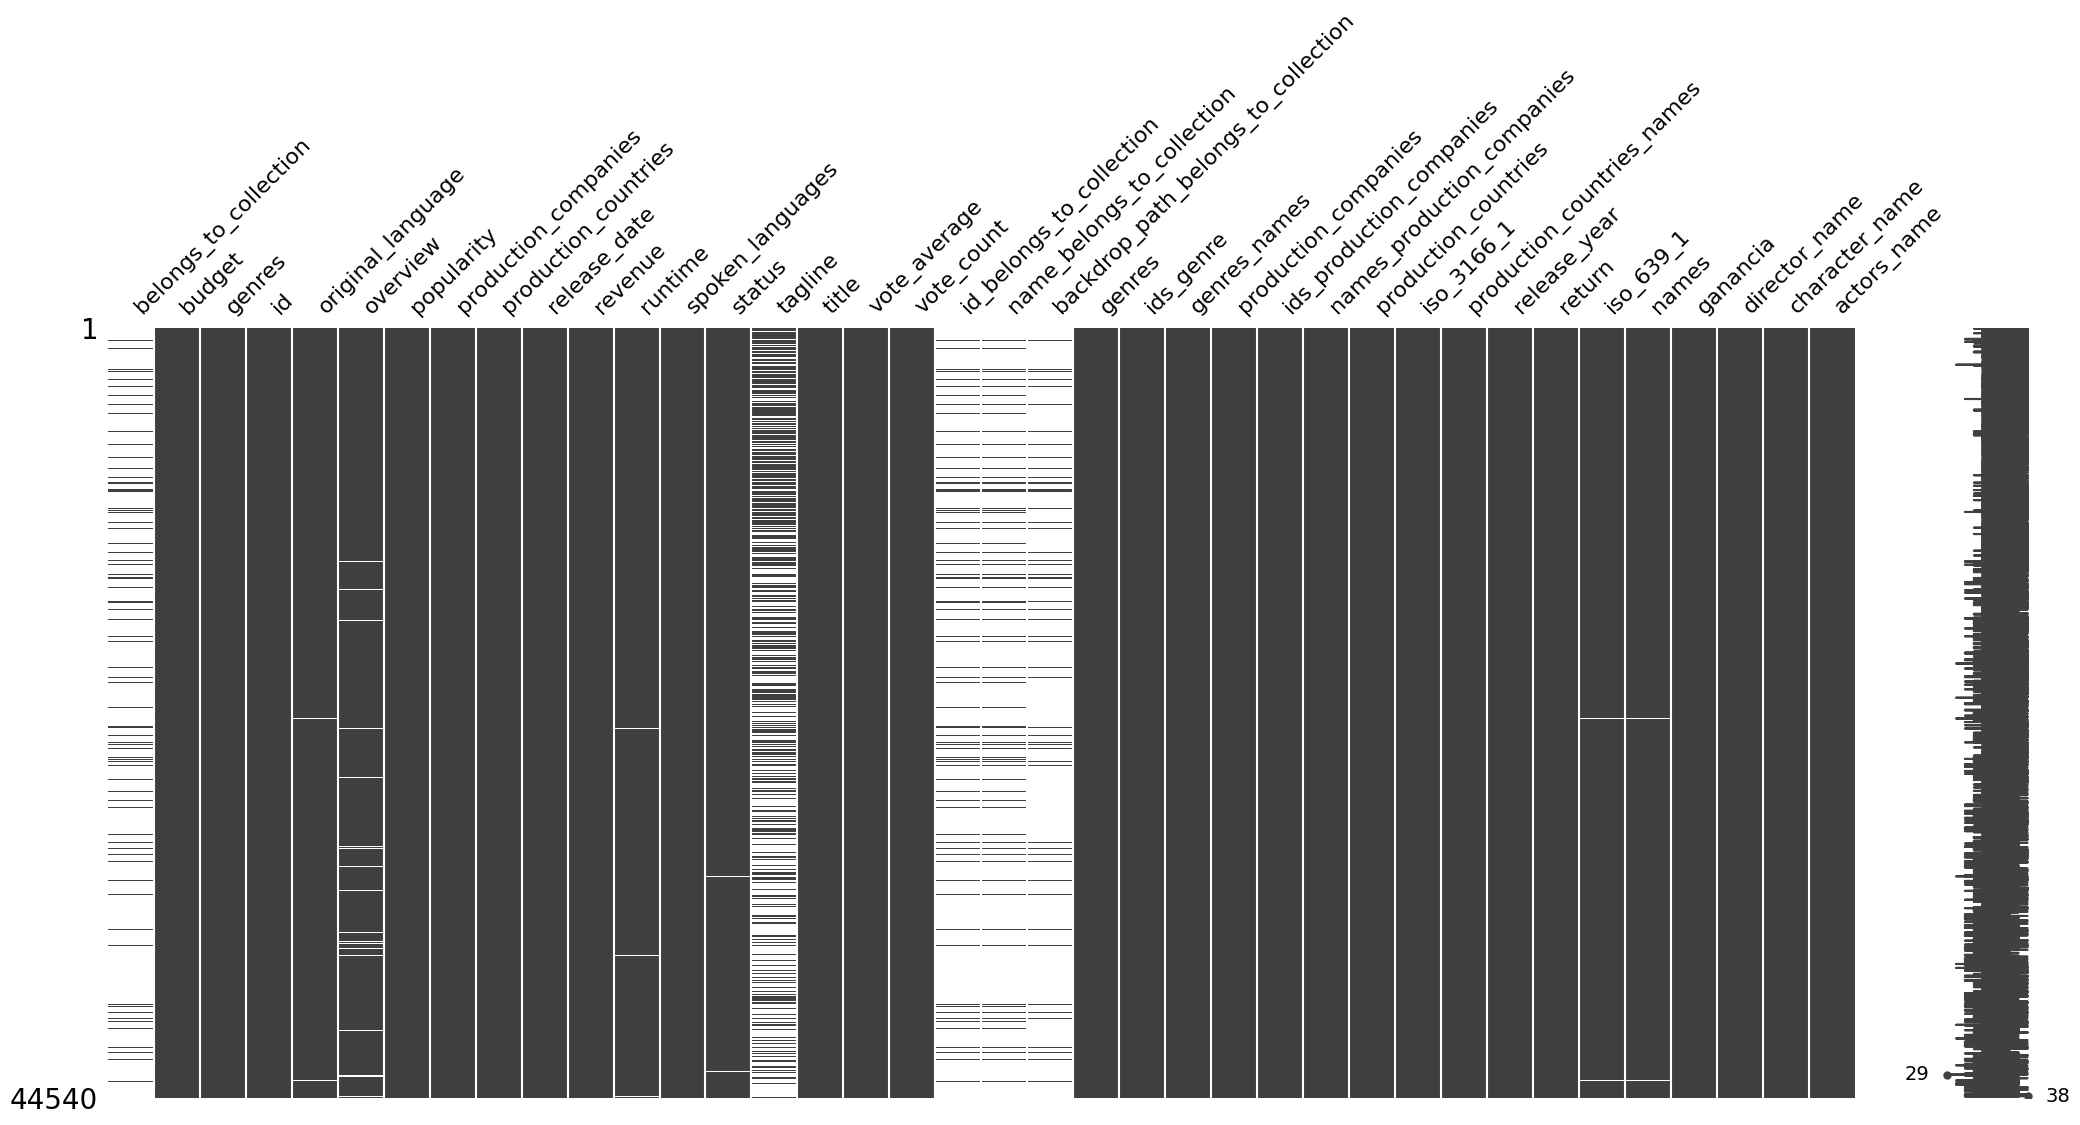

In [162]:
# Nulls by row

msno.matrix(df)

In [163]:
# All the pictures that belongs to the movies. Irrelevant for our analysis 
# drop this column

df_backdrop_b_t_c =df["backdrop_path_belongs_to_collection"]
df_backdrop_b_t_c[df_backdrop_b_t_c.notnull()]

0        /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
2        /hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
4        /7qwE57OVZmMJChBpLEbJEmzUydk.jpg
9        /6VcVl48kNKvdXOZfJPdarlUGOsk.jpg
12       /9VM5LiJV0bGb1st1KyHA3cVnO2G.jpg
                       ...               
44430    /gl9Gi60C9WYVkObOMll19OROhMC.jpg
44432    /38tF1LJN7ULeZAuAfP7beaPMfcl.jpg
44435    /38tF1LJN7ULeZAuAfP7beaPMfcl.jpg
44445    /38tF1LJN7ULeZAuAfP7beaPMfcl.jpg
44458    /3fhHbLeO3DqdHvgHg5szs399eBb.jpg
Name: backdrop_path_belongs_to_collection, Length: 3236, dtype: object

In [164]:
df.drop(columns=['backdrop_path_belongs_to_collection'], inplace=True)

In [165]:
# This null values do not require any treatment

df_btc = df[["belongs_to_collection", "name_belongs_to_collection","id_belongs_to_collection"]]
df_btc[df_btc["id_belongs_to_collection"].notnull()]

belongs_to_collection  \
0      {'id': 10194, 'name': 'Toy Story Collection', ...   
2      {'id': 119050, 'name': 'Grumpy Old Men Collect...   
4      {'id': 96871, 'name': 'Father of the Bride Col...   
9      {'id': 645, 'name': 'James Bond Collection', '...   
12     {'id': 117693, 'name': 'Balto Collection', 'po...   
...                                                  ...   
44432  {'id': 37261, 'name': 'The Carry On Collection...   
44435  {'id': 37261, 'name': 'The Carry On Collection...   
44445  {'id': 37261, 'name': 'The Carry On Collection...   
44447  {'id': 477208, 'name': 'DC Super Hero Girls Co...   
44458  {'id': 200641, 'name': 'Red Lotus Collection',...   

           name_belongs_to_collection  id_belongs_to_collection  
0                Toy Story Collection                   10194.0  
2           Grumpy Old Men Collection                  119050.0  
4      Father of the Bride Collection                   96871.0  
9               James Bond Collection                     645.0  
12                   Balto Collection                  117693.0  
...                               ...                       ...  
44432         The Carry On Collection                   37261.0  
44435         The Carry On Collection                   37261.0  
44445         The Carry On Collection                   37261.0  
44447  DC Super Hero Girls Collection                  477208.0  
44458            Red Lotus Collection                  200641.0  

[4453 rows x 3 columns]

This tells that 10 % of the movies form part of a collection of movies.

In [166]:
# Famous quote associated with the movie.
# Therefore, no treatment is needed for the missing data.
# 44.4% of the movies have a famous quote.


df["tagline"]

0                                                      NaN
1                Roll the dice and unleash the excitement!
2        Still Yelling. Still Fighting. Still Ready for...
3        Friends are the people who let you be yourself...
4        Just When His World Is Back To Normal... He's ...
                               ...                        
44535                                                  NaN
44536                                                  NaN
44537                               A deadly game of wits.
44538                                                  NaN
44539                                                  NaN
Name: tagline, Length: 44540, dtype: object

In [167]:
df_money = df[["revenue", "budget","return"]]
return_na = df_money[df_money["return"].isnull()]
return_na["budget"].sum() # For the 'na' values in return, the budgets are listed as 0, so we will impute a 0, 
# just as we did before with these columns.
df["return"]  = df["return"].fillna(0)
df["return"].isnull().sum()# check that it is ok

0

In [168]:
df["overview"]

# A brief summary of the movie:
# Less than 2% of the movies in the dataframe do not have a summary.
# No treatment is needed for the missing values.

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
44535    Yet another version of the classic epic, with ...
44536    An artist struggles to finish his work while a...
44537    When one of her hits goes wrong, a professiona...
44538    In a small town live two brothers, one a minis...
44539    50 years after decriminalisation of homosexual...
Name: overview, Length: 44540, dtype: object

In [169]:
df_time =df[df["runtime"].isnull()]
df_time
runtime_mean = df["runtime"].mean()

# I impute the few missing values (211) with the mean of runtime.
df["runtime"].fillna(runtime_mean, inplace=True)

In [170]:
df.runtime.value_counts()

90.0     2513
100.0    1447
95.0     1401
0.0      1322
93.0     1202
         ... 
271.0       1
357.0       1
234.0       1
219.0       1
780.0       1
Name: runtime, Length: 345, dtype: int64

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\2895671368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["runtime"])


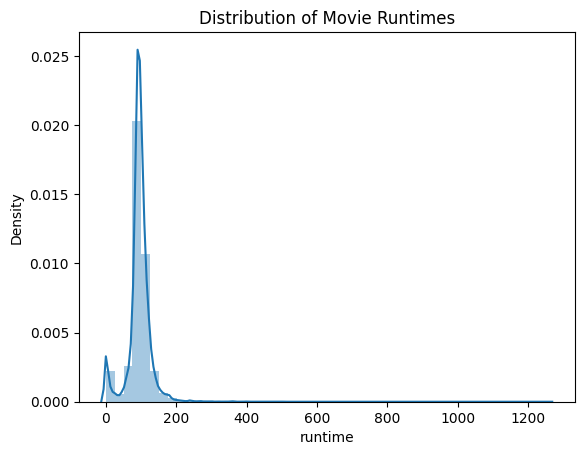

In [171]:
sns.distplot(df["runtime"])
plt.title("Distribution of Movie Runtimes")
plt.show()

Taking into account what we mentioned earlier regarding the duration of movies ('runtime'), we notice that the mean is 1 hour and 34 minutes, but that 50% of the movies fall between 1 hour 25 minutes and 1 hour 47 minutes.

Of course, a movie cannot have no runtime, so we have decided to impute these values with the mean, considering the distribution and the fact that the majority have that duration.

In [172]:
status_na = df[df["status"].isnull()]
print("Null data of status column: ", len(status_na))
print("Of this null values, those movies where launched in this years")
print("")
print(status_na.release_year.value_counts())
print("")
print(" The quantity of values of status feature actually is:")
df["status"].value_counts()


Null data of status column:  61
Of this null values, those movies where launched in this years

2010.0    8
2008.0    4
2009.0    4
2001.0    4
2005.0    4
2012.0    4
2002.0    3
2011.0    3
2006.0    2
2004.0    2
1974.0    2
1997.0    2
1995.0    2
1989.0    2
1991.0    2
1998.0    2
1966.0    1
1987.0    1
1990.0    1
1976.0    1
1971.0    1
2003.0    1
1992.0    1
2000.0    1
1994.0    1
1988.0    1
1905.0    1
Name: release_year, dtype: int64

 The quantity of values of status feature actually is:


Released           44126
Rumored              223
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

Since there are few values, and the vast majority of all values in the dataset are 'released', we will assume that they were released with a 'released' status, also taking into account that they had a release date.

In [173]:
df["status"].fillna("Released", inplace=True)
df["status"].value_counts() # Check everythings ok

Released           44187
Rumored              223
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [174]:
df_lang = df[df["original_language"].isnull()]
df_lang[["overview", "tagline", "title"]]

# While the vast majority of movies, approximately 70%, are in English, 
# and considering that their short summary is in English, it seems appropriate to impute them as 'en', 
# except for 'fr' at index 43184, which has the title and language in French ('Lettre d'une inconnue')

overview tagline  \
19405  Documentary about the production of The Third ...     NaN   
21386  An Outback farmer takes in an Afghani woman wh...     NaN   
22588  A group of Union Army soldiers is charged with...     NaN   
31716  George and Gracie enter an elegant drawing roo...     NaN   
36786  The first fairy tale transformed into a full-l...     NaN   
40305  Until the late 1970s, the Pakistani city of La...     NaN   
41095  Two dancers perform in succession facing a sta...     NaN   
43184                                                NaN     NaN   
43527  The traditional crafts of crochet and knitting...     NaN   
43688  American investment fund buys Austrian compani...     NaN   
43765  Three military men, seen inside a fortificatio...     NaN   

                            title  
19405     Shadowing the Third Man  
21386              Unfinished Sky  
22588             13 Fighting Men  
31716                   Lambchops  
36786               Prince Bayaya  
40305              Song of Lahore  
41095  Annabelle Serpentine Dance  
43184       Lettre d'une inconnue  
43527                        Yarn  
43688                      WiNWiN  
43765  The Surrender of Tournavos

In [175]:
ol_na_fr = df.loc[43184]
ol_na_fr[["production_companies", "spoken_languages","title", "production_countries"]]
# Considering the title, the spoken language, and the country of production, it is more than appropriate to impute 'fr' for France.
df.loc[43184, "original_language"] = "fr"
df.loc[43184].original_language



'fr'

In [176]:
df_lang = df[df["original_language"].isnull()]
df_lang
# The rest of values we impute them as en as said before
df["original_language"].fillna("en", inplace=True)
df["original_language"].isnull().sum() # checking no more null values


0

In [177]:
df_code_country = df[df["iso_639_1"].isnull()]
df_code_country[["iso_639_1","names", "spoken_languages","title" ]]
df.loc[43184, "iso_639_1"] = "fr"
df.loc[43184, "names"] = ""

In [178]:
df_code_country = df[df["iso_639_1"].isnull()]
df_code_country[["iso_639_1","names","title" ]]
df["iso_639_1"].fillna("en", inplace = True)

In [179]:
df["iso_639_1"].isnull().sum() # check

0

In [180]:
df["names"].fillna("", inplace = True)
df["names"].isnull().sum()

0

#### EXPLORATORY DATA ANALYSIS - EDA

In [181]:
df.shape

(44540, 37)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44540 entries, 0 to 44539
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   belongs_to_collection       4453 non-null   object        
 1   budget                      44540 non-null  float64       
 2   genres                      44540 non-null  object        
 3   id                          44540 non-null  object        
 4   original_language           44540 non-null  object        
 5   overview                    43671 non-null  object        
 6   popularity                  44540 non-null  object        
 7   production_companies        44540 non-null  object        
 8   production_countries        44540 non-null  object        
 9   release_date                44540 non-null  datetime64[ns]
 10  revenue                     44540 non-null  float64       
 11  runtime                     44540 non-null  float64   

In [183]:
# "A statistical report of the numerical variables. Initial insight into what the data represents.
# Further analysis will be conducted later.

df.describe() #include="all". It last longer to load and it isn't usefull

budget       revenue       runtime  vote_average    vote_count  \
count  4.454000e+04  4.454000e+04  44540.000000  44540.000000  44540.000000   
mean   4.310801e+06  1.143997e+07     94.640709      5.653424    112.086753   
std    1.759293e+07  6.497296e+07     37.312432      1.870318    496.117600   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    0.000000e+00  0.000000e+00     85.000000      5.000000      3.000000   
50%    0.000000e+00  0.000000e+00     95.000000      6.000000     10.000000   
75%    0.000000e+00  0.000000e+00    107.000000      6.800000     35.000000   
max    3.800000e+08  2.787965e+09   1256.000000     10.000000  14075.000000   

       id_belongs_to_collection  release_year        return      ganancia  
count               4453.000000  44540.000000  4.454000e+04  4.454000e+04  
mean              183631.826185   1991.707499  6.724315e+02  7.129171e+06  
std               141513.518608     24.124821  7.539098e+04  5.266695e+07  
min                   10.000000   1874.000000  0.000000e+00 -1.657101e+08  
25%                85945.000000   1978.000000  0.000000e+00  0.000000e+00  
50%               141290.000000   2001.000000  0.000000e+00  0.000000e+00  
75%               293981.000000   2010.000000  0.000000e+00  0.000000e+00  
max               480160.000000   2020.000000  1.239638e+07  2.550965e+09

##### UNIVARIATE ANALYSIS

In [184]:
# Look at the columns to perform the univariate analysis.

df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_belongs_to_collection', 'name_belongs_to_collection',
       'genres', 'ids_genre', 'genres_names', 'production_companies',
       'ids_production_companies', 'names_production_companies',
       'production_countries', 'iso_3166_1', 'production_countries_names',
       'release_year', 'return', 'iso_639_1', 'names', 'ganancia',
       'director_name', 'character_name', 'actors_name'],
      dtype='object')

###### "original_language"

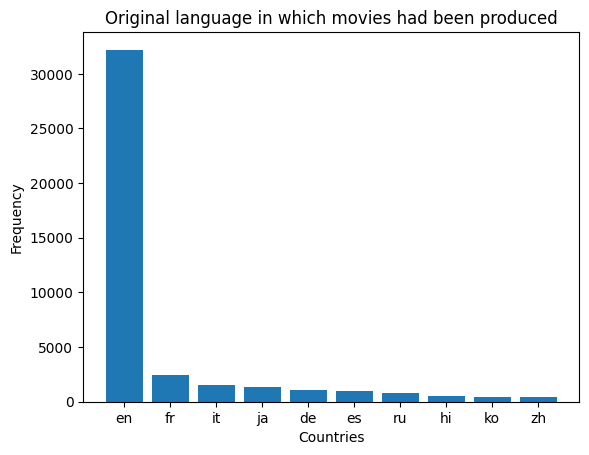

In [185]:
# Check of the languages in which the movies where developed

top_10_ol = movies_language.iloc[0:10]

plt.bar(top_10_ol.country_code.values, top_10_ol.original_language )

plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Original language in which movies had been produced')

plt.show()

In [186]:
# I see the small number of movies that were produced in their original languages.

len(movies_language[movies_language["original_language"]<=5])

37

Most of the movies are produced in the most common languages, especially English, which accounts for 71% of the movies in this dataset.

Following that, as expected, are the world's major languages but in much smaller proportions, as demonstrated by the graph.

The top 10 languages in terms of original languages make up 91% of the total dataset.

The dataset lists "92" languages, which is not accurate because there are incorrect data entries in those columns, such as the numbers 82, 104, and 68. Among these 89 languages, 37 of them have fewer than 5 movies produced in that language, highlighting their limited representation and significance in the dataset.

###### "spoken_languages"

In [187]:
# I analyze the column of languages spoken in the movies.
# I perform a count to gather information about the frequency of each language.

df_language
df_language_exploded_id = df_language["iso_639_1"].explode('iso_639_1')
df_language_exploded_name = df_language["names"].explode('names')
df_language_exploded_concat = pd.concat([df_language_exploded_id, df_language_exploded_name], axis=1)


In [188]:
df_language_exploded_concat.dropna(inplace= True)

In [189]:
df_conteo_lang = df_language_exploded_concat["iso_639_1"].value_counts()

In [190]:
# I create a top 10 list to focus on the most representative languages.

df_language_top_10 = df_conteo_lang.iloc[0:10]
df_language_top_10

en    28745
fr     4196
de     2625
es     2413
it     2367
ja     1758
ru     1563
zh      790
hi      707
pt      591
Name: iso_639_1, dtype: int64

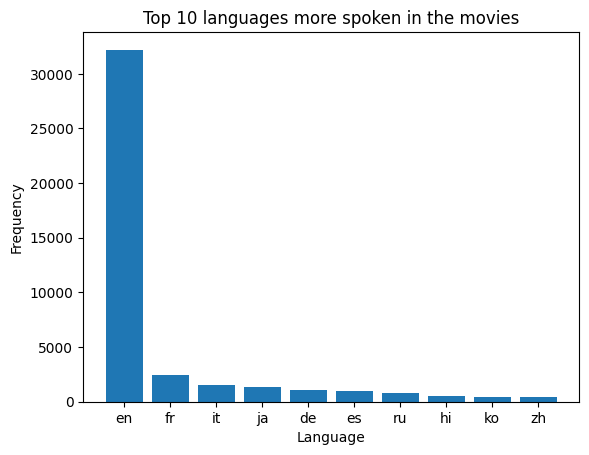

In [191]:
# Visual to see the languages that are more spoken

df_language_top_10 = movies_language.iloc[0:10]

plt.bar(df_language_top_10.country_code.values, df_language_top_10.original_language )

plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Top 10 languages more spoken in the movies')

plt.show()

In [192]:
print("There is an", round(df_language_exploded_concat.shape[0] / movies.shape[0] *100 -100 , 2) , " % probability that a movie has been translated into at least one language")


There is an 17.46  % probability that a movie has been translated into at least one language


Of course, the languages in which the movies are played are greater since it is translated into other languages.

But roughly, they maintain the same as what we saw in the original language, where the most widely spoken languages worldwide are the ones these movies were dubbed into, and as expected, in greater proportion, especially since there are movies dubbed into several languages with more reach and adaptation to local markets.

###### "production_countries"

In [193]:
# Now lets go with the countries that produced movies

df_countries_exploded_id = df_countries["iso_3166_1"].explode('iso_3166_1')
df_countries_exploded_name = df_countries["production_countries_names"].explode('production_countries_names')
df_countries_exploded_concat = pd.concat([df_countries_exploded_id, df_countries_exploded_name], axis=1)
df_countries_exploded_concat["iso_3166_1"].value_counts()

US    21153
GB     4094
FR     3940
DE     2254
IT     2169
      ...  
MG        1
SO        1
KW        1
MQ        1
GN        1
Name: iso_3166_1, Length: 161, dtype: int64

In [194]:
df_countries_top_10 = df_countries_exploded_concat["iso_3166_1"].value_counts()
df_countries_top_10 = df_countries_top_10.iloc[0:10]
df_countries_top_10.head()

US    21153
GB     4094
FR     3940
DE     2254
IT     2169
Name: iso_3166_1, dtype: int64

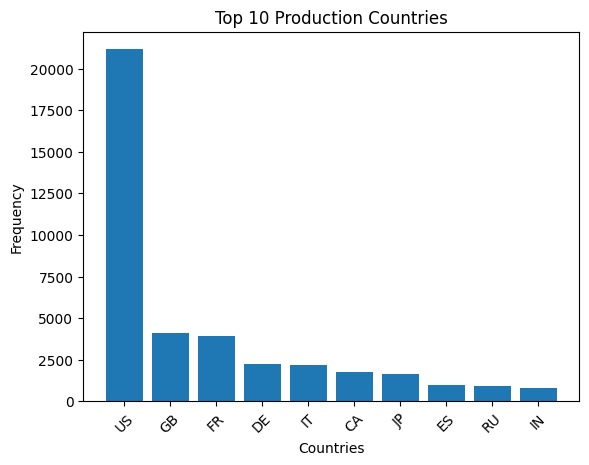

In [195]:
# I look at the most representative ones

df_countries_top_10 = df_countries_exploded_concat["iso_3166_1"].value_counts()
df_countries_top_10 = df_countries_top_10.iloc[0:10]
df_countries_top_10

plt.bar(df_countries_top_10.index, df_countries_top_10.values)

plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Top 10 Production Countries')

plt.xticks(rotation=45)

plt.show()

In [196]:

print("At least  ", round(df_countries_exploded_concat.shape[0] / movies.shape[0] *100 -100 , 2) , "%  of the movies were produced in more than one country ")

At least   22.78 %  of the movies were produced in more than one country 


We see that in terms of movie production with respect to countries, the same pattern we were seeing is repeated. The difference is that there is even more movement in the sense that movies are produced in more countries.

###### "production_companies"

In [197]:
# Analysis of movie production companies with the previously created dataframe

succesful_production_companies.head(20)

Production_Company  Movie_Count       revenue  \
0                                  Warner Bros.         1250  6.352519e+10   
1                     Metro-Goldwyn-Mayer (MGM)         1076  1.237679e+10   
2                            Paramount Pictures         1003  4.880819e+10   
3        Twentieth Century Fox Film Corporation          836  4.768775e+10   
4                            Universal Pictures          830  5.525919e+10   
5                 Columbia Pictures Corporation          448  1.134909e+10   
6                                        Canal+          438  6.214656e+09   
7                             Columbia Pictures          431  3.227974e+10   
8                            RKO Radio Pictures          290  1.122452e+09   
9                                United Artists          279  5.958309e+09   
10                              New Line Cinema          277  2.217339e+10   
11                         Walt Disney Pictures          263  4.083727e+10   
12                          Touchstone Pictures          225  1.412178e+10   
13                             TriStar Pictures          197  8.022367e+09   
14                                      Mosfilm          188  1.864355e+07   
15                                Miramax Films          183  5.783693e+09   
16                              France 2 Cinéma          168  5.103732e+08   
17  Centre National de la Cinématographie (CNC)          163  2.072581e+08   
18                                 Toho Company          142  1.262973e+09   
19                                    BBC Films          131  1.319821e+09   

    Average_profit_per_company  
0                 5.082015e+07  
1                 1.150259e+07  
2                 4.866221e+07  
3                 5.704276e+07  
4                 6.657734e+07  
5                 2.533279e+07  
6                 1.418871e+07  
7                 7.489498e+07  
8                 3.870522e+06  
9                 2.135595e+07  
10                8.004834e+07  
11                1.552748e+08  
12                6.276349e+07  
13                4.072267e+07  
14                9.916784e+04  
15                3.160488e+07  
16                3.037936e+06  
17                1.271522e+06  
18                8.894174e+06  
19                1.007497e+07

In [198]:
print("Companies that produced more than 50 productions: ",succesful_production_companies[succesful_production_companies["Movie_Count"]>50].shape[0])
print("Total number of production companies: ", succesful_production_companies.shape[0])

Companies that produced more than 50 productions:  98
Total number of production companies:  23533


There are several movie production companies in this dataset, with the most successful ones having a high production rate. The top 20 companies produced over 130 movies.

98 successful companies produced more than 50 movies.

But as we can see in this category, the movie production companies are much more diverse, which is logical, given that there are a total of 23,533 companies in this dataset.

###### "bellongs_to_collection"

In [199]:
# Movies with collections

btc = df_btc[df_btc["id_belongs_to_collection"].notnull()].shape[0]


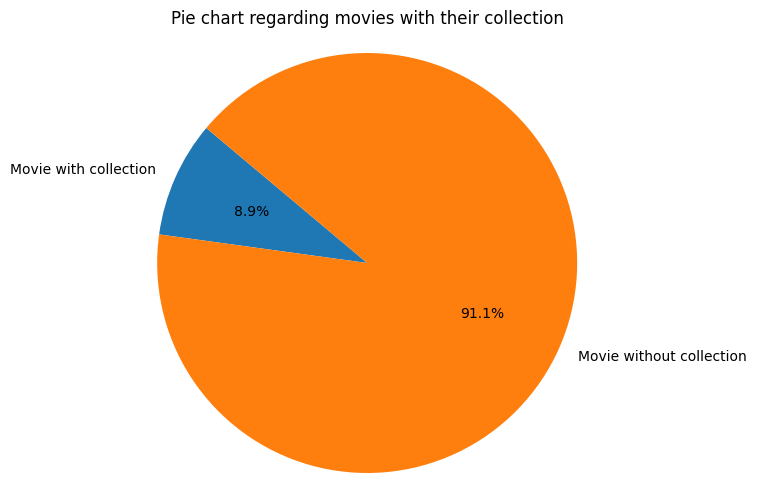

In [200]:
# Lets look at the percentage they represent of the whole df.

title = ['Movie with collection', 'Movie without collection']
pie = [btc, movies.shape[0]]

plt.figure(figsize=(8, 6))
plt.pie(pie, labels=title, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Pie chart regarding movies with their collection')

plt.show()

8.9% of the movies have franchises, meaning they were not created as standalone films but had sequels in subsequent movies.

###### "status"

In [201]:
# Checking the state feature

df_status = df["status"].value_counts()
df_status

Released           44187
Rumored              223
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

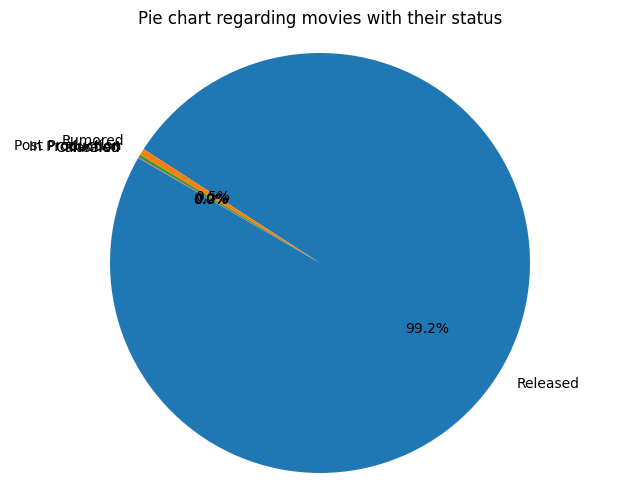

In [204]:
# Graph for showing the % that movies states represents

plt.figure(figsize=(8, 6))
plt.pie(df_status,labels= df_status.index,  autopct='%1.1f%%', startangle=150)
plt.axis('equal')  
plt.title('Pie chart regarding movies with their status')

plt.show()

I'm going to consider only the movies that have been released, which are the majority and are of interest for analysis and for building the movie recommendation model.

In [205]:
df = df[df["status"]=="Released"]

###### "release_date" | "release_year"

In [206]:
# Analysis with the release dates of movies

df.release_year.value_counts()

2014.0    1917
2013.0    1843
2015.0    1836
2012.0    1684
2011.0    1607
          ... 
1887.0       1
1878.0       1
1874.0       1
1893.0       1
1883.0       1
Name: release_year, Length: 133, dtype: int64

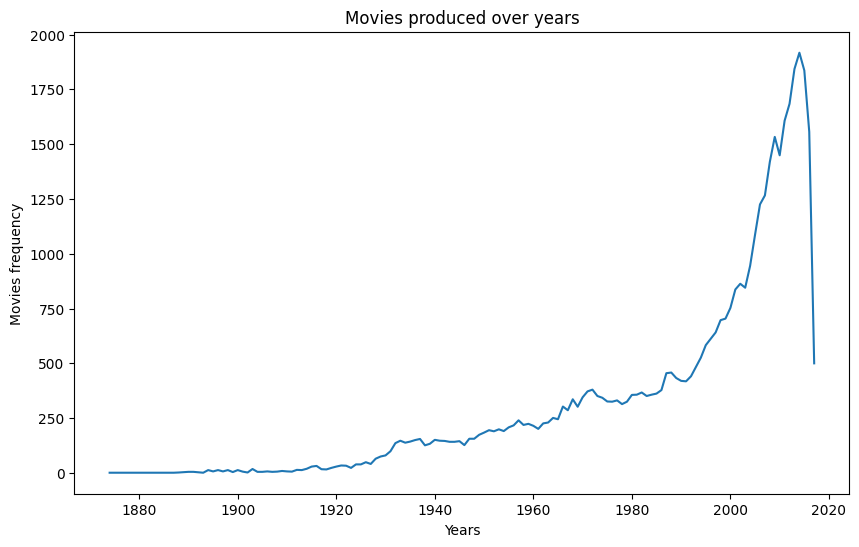

In [207]:
# Line chart to visualize the evolution of movie releases over the years

plt.figure(figsize=(10, 6))
sns.lineplot(df.release_year.value_counts())

plt.title("Movies produced over years")
plt.xlabel("Years")
plt.ylabel("Movies frequency")


plt.show()

In [208]:
# I view the years from lowest to highest in order to observe peaks and trends

np.sort(df.release_year.unique())

array([1874., 1878., 1883., 1887., 1888., 1890., 1891., 1892., 1893.,
       1894., 1895., 1896., 1897., 1898., 1899., 1900., 1901., 1902.,
       1903., 1904., 1905., 1906., 1907., 1908., 1909., 1910., 1911.,
       1912., 1913., 1914., 1915., 1916., 1917., 1918., 1919., 1920.,
       1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929.,
       1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938.,
       1939., 1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947.,
       1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956.,
       1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965.,
       1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.,
       1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983.,
       1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012.,

In [209]:
df_old_movies = df[df["release_year"]<=1895]
df_old_movies[["title", "release_date", "release_year", "overview", "runtime" ]].sort_values(by= "release_year")

title release_date  \
34437                              Passage of Venus   1874-12-09   
34434                    Sallie Gardner at a Gallop   1878-06-14   
40840                               Buffalo Running   1883-11-19   
34430                   Man Walking Around a Corner   1887-08-18   
34431                              Accordion Player   1888-01-01   
34435                 Traffic Crossing Leeds Bridge   1888-10-15   
34433                           Monkeyshines, No. 2   1890-11-21   
34432                           Monkeyshines, No. 1   1890-11-21   
34436                     London's Trafalgar Square   1890-01-01   
39250                           Monkeyshines, No. 3   1890-11-21   
40444                                     Mosquinha   1890-03-09   
28270                              Dickson Greeting   1891-01-01   
34635                                      La Vague   1891-11-15   
40445                                  Je Vous Aime   1891-01-01   
34442                                Newark Athlete   1891-05-01   
34569                                    Men Boxing   1891-04-30   
34636                                  A Hand Shake   1892-01-01   
34702                                       Fencing   1892-01-01   
31877                                  Poor Pierrot   1892-10-28   
18991                              Blacksmith Scene   1893-05-08   
41894                                 Buffalo Dance   1894-09-23   
42671                                The Barbershop   1894-01-01   
41423                                   Falling Cat   1894-01-01   
42712  The Pickaninny Dance from the “Passing Show”   1894-05-16   
42924                                    Carmencita   1894-03-14   
41099                                  Annie Oakley   1894-11-01   
41098                                  Hadj Cheriff   1894-10-05   
41096                             Sioux Ghost Dance   1894-09-23   
17454        Edison Kinetoscopic Record of a Sneeze   1894-01-09   
41094              The Boxing Cats (Prof. Welton's)   1894-07-16   
41026      Souvenir Strip of the Edison Kinetoscope   1894-05-18   
44061                Luis Martinetti, Contortionist   1894-01-01   
18870               Dickson Experimental Sound Film   1894-08-31   
41088                                   Baby's Meal   1895-12-27   
39251                          Wintergartenprogramm   1895-11-01   
42668         The Execution of Mary, Queen of Scots   1895-08-28   
25612           Workers Leaving the Lumière Factory   1895-06-10   
23558                 Tables Turned on the Gardener   1895-12-27   
41095                    Annabelle Serpentine Dance   1895-04-01   
44494                               Baignade en Mer   1895-12-28   

       release_year                                           overview  \
34437        1874.0  Photo sequence of the rare transit of Venus ov...   
34434        1878.0  Sallie Gardner at a Gallop was one of the earl...   
40840        1883.0  Individual photographs of the running of a buf...   
34430        1887.0  The last remaining production of Le Prince's L...   
34431        1888.0  The last remaining film of Le Prince's LPCCP T...   
34435        1888.0  A film by Louis Aimé Augustin Le Prince, shot ...   
34433        1890.0  Experimental film that follows up on the resul...   
34432        1890.0  Experimental film made to test the original cy...   
34436        1890.0  Moving picture of London's Trafalgar Square tr...   
39250        1890.0  Experimental film that follows up on the resul...   
40444        1890.0                       Shot of the flight of a fly.   
28270        1891.0  William K.L. Dickson brings his hat from his o...   
34635        1891.0  Experimental film of a wave, recorded on the b...   
40445        1891.0  This early cinematic instance of a close-up—or...   
34442        1891.0  Experimental film fragment made with the Ediso...   
34569        1891.0  Experimental film fragment made with the Ediso...   

The cinema and the first public screening considered a 'movie' were developed in 1895 by the Lumière brothers, with the title 'Workers Leaving the Lumière Factory,' presented on June 10, 1895.

This fact caught my attention due to the existence of such old films. Upon researching the movies described in the dataset (as seen in the previous table), and considering that cinema was invented in 1895, I found that these are sequences of photographs, which is why they must be included in the dataset. Their durations are less than a minute.

As shown in the line chart (evolution over time), there are certain milestones and trends that marked the history of cinema. Below, I will provide a brief overview of the history of cinema, how it developed, and how certain historical, social, and technological milestones contributed to the growth of the industry.

Specifically, on December 28, 1895, the Lumière brothers screened a series of short films in Paris, which is considered one of the first public screenings of moving pictures. This date is often regarded as the official beginning of cinema.

Next, Technicolor emerged in the 1910s and 1920s, leading to more widespread use and improvement in the quality of color in cinema.

During the subsequent years, until the 1930s, movies were in black and white. From the 1930s onward, accompanied by certain milestones, movies began to be produced in greater quantities. These milestones included the introduction of sound and dialogue (previously silent films), the birth of musicals, the emergence of movie stars and glamour, and the expansion of genres. In addition to sound, there were technical advances in areas such as cinematography, lighting, and editing. These advances allowed for higher visual and narrative quality in films, resulting in increased popularity, diversity, and sophistication of movies.

Following this, animated films gained prominence in the 1940s. 'Snow White and the Seven Dwarfs' (1937), produced by Walt Disney, is considered the first animated feature film in color and one of the early animated feature-length films. It was a significant milestone in the history of animation.

In 1960, there is another notable trend of increased movie production. This can be attributed to several factors:

- The emergence of the 'New Hollywood,' where young and ambitious directors began challenging conventions and exploring darker and more realistic themes.

- Globally, influential cinematic movements like the Nouvelle Vague in France and Italian Neorealism emerged. These movements sought fresh and authentic ways to tell stories on screen.

- As films became more accessible and globalization advanced, cinema from different countries and cultures gained popularity worldwide.

There is also another marked exponential growth in the 1980s, as technological innovations, such as the use of special effects and widescreen formats, allowed for new visual possibilities in cinema. In the late 1970s and early 1980s, big-budget films with a focus on large-scale entertainment emerged. 'Star Wars' (1977) and 'Jaws' (1975) are prominent examples of films that paved the way for blockbuster cinema.

As films became more accessible and globalization advanced, cinema from different countries and cultures gained popularity worldwide.

From the 1990s, especially from the 2000s onwards, digital technology began revolutionizing film production and distribution. The rise of the Internet also changed how films were promoted and distributed. Alongside this, there was a boom in the production of many movies, coupled with technological advancements and exponential growth in the film industry.

In [211]:
# Extraction of days in which movies were released

df['release_date'] = pd.to_datetime(df['release_date'])
df_dates = df['release_date']
df_dates['weekday'] = df['release_date'].dt.day_name() 

movies_days = df_dates['weekday'].value_counts()
movies_days
 

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\2479155577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['weekday'] = df['release_date'].dt.day_name()


Friday       13601
Thursday      7341
Wednesday     6884
Saturday      5015
Tuesday       4473
Sunday        3479
Monday        3394
Name: release_date, dtype: int64

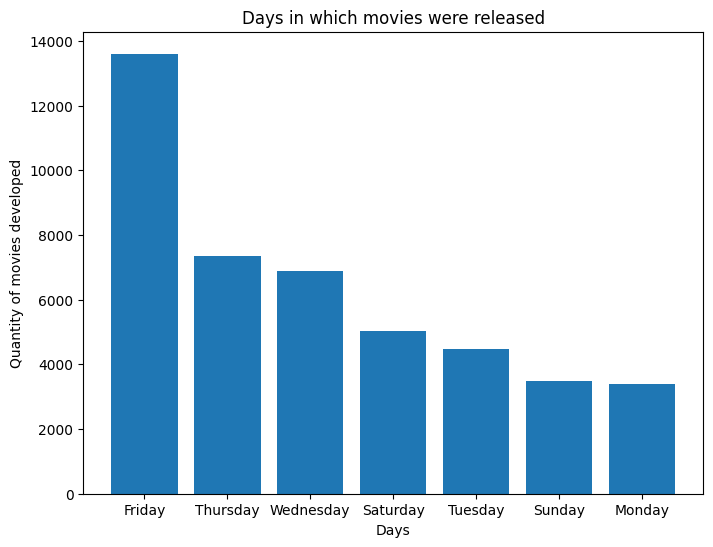

In [212]:
# Comparative bar chart to visualize the number of movies released on different days of the week

plt.figure(figsize=(8, 6))
plt.bar(movies_days.index, movies_days.values)

plt.xlabel('Days')
plt.ylabel('Quantity of movies developed')
plt.title('Days in which movies were released')

plt.show()

This chart displays the days on which movies were released.

This makes sense since, being an entertainment industry, we see that it is focused on the days leading up to the weekend, which is when cinemas experience higher attendance.

###### "runtime"

In [213]:
# Brief summary of the feature

df["runtime"].describe()

count    44187.000000
mean        94.730597
std         37.297289
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\301569381.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["runtime"])


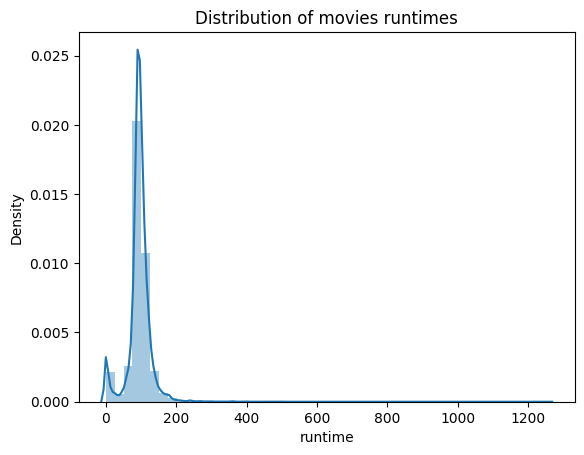

In [214]:
# Chart showing the distribution of movies runtimes

sns.distplot(df["runtime"])
plt.title("Distribution of movies runtimes")
plt.show()

In [215]:
print("Movies considered outliers, with durations exceeding 3 hours, represents ", round(df[df["runtime"]>180].shape[0]/df.shape[0]*100,2))

Movies considered outliers, with durations exceeding 3 hours, represents  1.11


In [216]:
# I filter these to see what they are about 

time = df[df["runtime"]>300]
time[["title", "overview", "tagline", "runtime"]].sort_values(by = "runtime", ascending = False)

title  \
23914                      Centennial   
19788                            Jazz   
40200                        Baseball   
13703           Berlin Alexanderplatz   
13886  Heimat: A Chronicle of Germany   
...                               ...   
8711                             1900   
11598              Eight Deadly Shots   
7894                       The Deluge   
33547               If Tomorrow Comes   
41252               The Miracle Rider   

                                                overview  \
23914  The economic and cultural growth of Colorado s...   
19788  A survey of the musical form's history and maj...   
40200  Chronicles the sport's signature people, place...   
13703  Berlin Alexanderplatz, originally broadcast in...   
13886  This epic tale of a family and their rural lif...   
...                                                  ...   
8711   Set in Bertolucci's ancestral region of Emilia...   
11598  Small-farmer Pasi shoots four policemen who ha...   
7894   Following With Fire and Sword', this is an ada...   
33547  This mini-series focuses on two people, Tracy ...   
41252  In 1930s Texas, following the murder of his fa...   

                                                 tagline  runtime  
23914                                                NaN   1256.0  
19788                                                NaN   1140.0  
40200                                                NaN   1140.0  
13703                                                NaN    931.0  
13886                                                NaN    925.0  
...                                                  ...      ...  
8711                                                 NaN    317.0  
11598                                                NaN    316.0  
7894                               Academy Award Nominee    315.0  
33547                     The excitement is in the chase    313.0  
41252  Idol of every Boy in the World - Greatest West...    306.0  

[95 rows x 4 columns]

In the 'runtime' feature, which represents the duration of movies in minutes, we observe that the mean duration is 1 hour and 34 minutes, with 50% of the movies falling between 1 hour 25 minutes and 1 hour 47 minutes.

We can also see that there are several movies in the dataset with shorter durations, which is not surprising, as we know there are short films that are not very long.

There are some outliers, as there are values exceeding 3 hours, totaling 490 movies (1.1% of the total dataset). The longest movie in the dataset has a duration of 1256 minutes, which is nearly 21 hours, quite unusual.

###### "popularity"

In [217]:
# Checking populiraty metric

df["popularity"] = df["popularity"].astype(float)
df["popularity"].describe()

count    44187.000000
mean         2.987338
std          6.068125
min          0.000000
25%          0.411953
50%          1.171280
75%          3.843353
max        547.488298
Name: popularity, dtype: float64

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\57940420.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["popularity"])


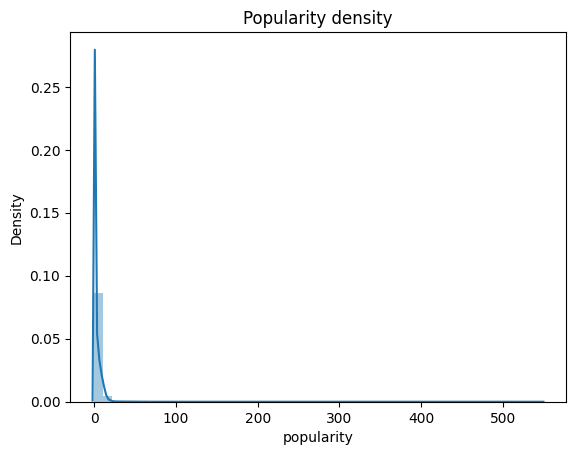

In [218]:
# Distribucion del indicador de popularidad

sns.distplot(df["popularity"])
plt.title("Popularity density")
plt.show()

In [219]:
# Most data points are below a popularity score of 10

df[df["popularity"]>10].sort_values(by="popularity")

belongs_to_collection       budget  \
37514                                               None   30000000.0   
16860  {'id': 2602, 'name': 'Scream Collection', 'pos...   40000000.0   
6832                                                None   18000000.0   
2948                                                None    8272296.0   
29378                                               None          0.0   
...                                                  ...          ...   
24187                                               None  165000000.0   
42798                                               None   34000000.0   
41437                                               None  160000000.0   
32909  {'id': 468552, 'name': 'Wonder Woman Collectio...  149000000.0   
30320  {'id': 86066, 'name': 'Despicable Me Collectio...   74000000.0   

                                                  genres      id  \
37514  {'id': 14, 'name': 'Fantasy'}, {'id': 35, 'nam...  322240   
16860  {'id': 27, 'name': 'Horror'}, {'id': 9648, 'na...   41446   
6832                         {'id': 18, 'name': 'Drama'}   18410   
2948   {'id': 35, 'name': 'Comedy'}, {'id': 18, 'name...      99   
29378                       {'id': 28, 'name': 'Action'}  283322   
...                                                  ...     ...   
24187  {'id': 12, 'name': 'Adventure'}, {'id': 10751,...  177572   
42798  {'id': 28, 'name': 'Action'}, {'id': 80, 'name...  339403   
41437  {'id': 10751, 'name': 'Family'}, {'id': 14, 'n...  321612   
32909  {'id': 28, 'name': 'Action'}, {'id': 12, 'name...  297762   
30320  {'id': 10751, 'name': 'Family'}, {'id': 16, 'n...  211672   

      original_language                                           overview  \
37514                en  A stuffy businessman finds himself trapped ins...   
16860                en  Sidney Prescott, now the author of a self-help...   
6832                 en  A young inductee into the military is given th...   
2948                 es  A single mother in Madrid sees her only son di...   
29378                en  Hongi, a Maori chieftain’s teenage son, must a...   
...                 ...                                                ...   
24187                en  The special bond that develops between plus-si...   
42798                en  After being coerced into working for a crime b...   
41437                en  A live-action adaptation of Disney's version o...   
32909                en  An Amazon princess comes to the world of Man t...   
30320                en  Minions Stuart, Kevin and Bob are recruited by...   

       popularity                               production_companies  \
37514   10.000208  {'name': 'EuropaCorp', 'id': 6896}, {'name': '...   
16860   10.000721            {'name': 'Dimension Films', 'id': 7405}   
6832    10.000775  {'name': '20th Century Fox', 'id': 25}, {'name...   
2948    10.000915  {'name': 'Renn Productions', 'id': 82}, {'name...   
29378   10.001517  {'name': 'General Film Corporation', 'id': 13742}   
...           ...                                                ...   
24187  213.849907  {'name': 'Walt Disney Pictures', 'id': 2}, {'n...   
42798  228.032744  {'name': 'Big Talk Productions', 'id': 443}, {...   
41437  287.253654  {'name': 'Walt Disney Pictures', 'id': 2}, {'n...   
32909  294.337037  {'name': 'Dune Entertainment', 'id': 444}, {'n...   
30320  547.488298  {'name': 'Universal Pictures', 'id': 33}, {'na...   

                                    production_countries release_date  ...  \
37514  {'iso_3166_1': 'CN', 'name': 'China'}, {'iso_3...   2016-08-03  ...   
16860  {'iso_3166_1': 'US', 'name': 'United States of...   2011-04-11  ...   
6832   {'iso_3166_1': 'US', 'name': 'United States of...   1987-04-17  ...   
2948   {'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_3...   1999-04-19  ...   
29378        {'iso_3166_1': 'NZ', 'name': 'New Zealand'}   2014-09-04  ...   
...                                                  ...          ...  

According to the TMDB website: Popularity is a very important metric on TMDB (The Movie Database). It helps boost search results and provides an incredible and useful order for discovery.

Popularity is calculated using the following factors:

- Number of votes per day
- Number of views per day
- Number of users who mark the movie as 'favorite' per day
- Number of users who add the movie to their 'watchlist' per day
- Release date
- Total number of votes
- Score from the previous day

Regarding this indicator, the vast majority of the data, all except for 3017 records, are below 10 points of popularity.



###### "vote_average"

In [220]:
# Description of the variable for the average movie rating on a scale from 1 to 10

df["vote_average"].describe()

count    44187.000000
mean         5.655989
std          1.866078
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

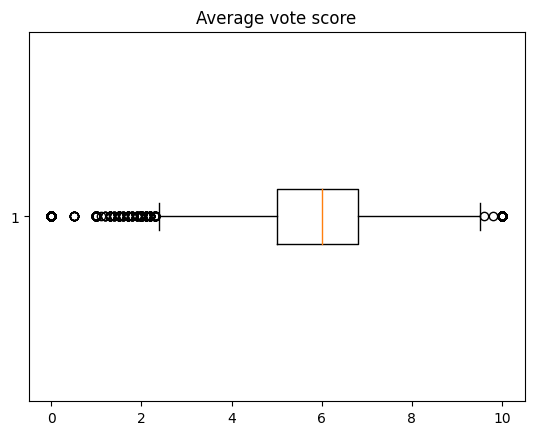

In [222]:
# I'm creating a box plot to visualize the values along with their measures of central tendency

plt.boxplot(df['vote_average'], vert=False)  

plt.title('Average vote score')

plt.show()

Regarding 'vote_average,' the movie rating is on a scale of 0 to 10, where we observe that the central 50% falls between 5 and 6.8, just like its mean at 5.6
 

###### "budget"

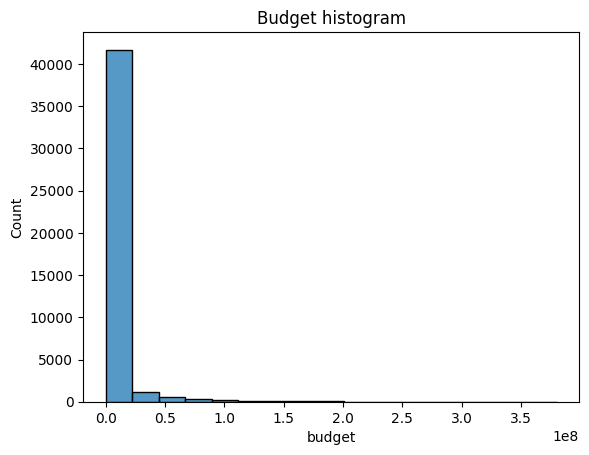

In [223]:
# Histogram of the budget column

sns.histplot(df["budget"])
plt.title("Budget histogram")
plt.show()

In [225]:
# Great amount of values in 0

print("Budget values that are 0: ",df.budget.value_counts()[0])
print("They represent ", round(df.budget.value_counts()[0]/df.shape[0],2), "% of the whole dataset")


Budget values that are 0:  35358
They represent  0.8 % of the whole dataset


We can see that there are several budget values at 0. This could be due to data being loaded incorrectly or because of confidentiality, where the data was not shared. However, the frequency of these 0 values is quite significant.

This distortion can hinder conducting an analysis that is not biased by the lack of information.

###### "revenue"

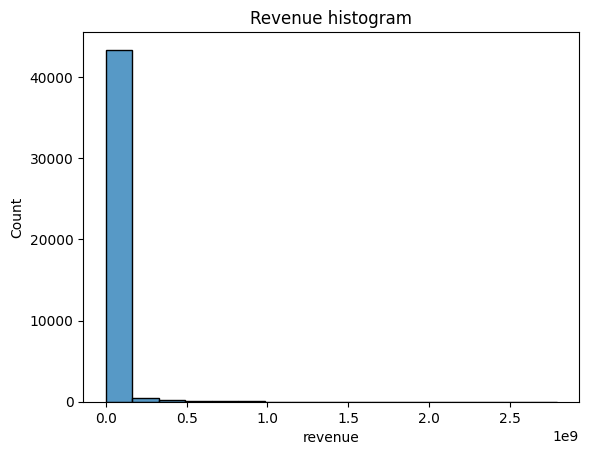

In [226]:
# Histogram of the revenue

sns.histplot(df["revenue"])
plt.title("Revenue histogram")
plt.show()

In [227]:
# Even more values in 0

print("Revenue values that are 0: ",df.revenue.value_counts()[0])
print("They represent ", round(df.revenue.value_counts()[0]/df.shape[0],2), "% of the whole dataset")

Revenue values that are 0:  36803
They represent  0.83 % of the whole dataset


The same pattern repeats for the revenue of the movies, and in this variable, there are even more records with a value of 0.

###### "return"

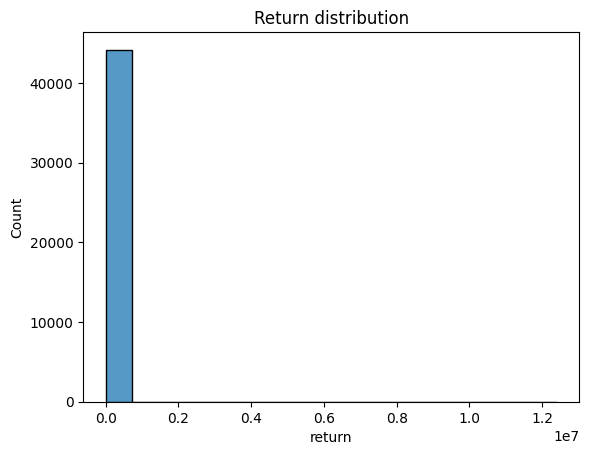

In [228]:
# Same distribution, column derivated from the previous columns analysed

sns.histplot(df["return"])
plt.title("Return distribution")
plt.show()

In [229]:
# Even more values in 0

print("Return values in 0: ",df["return"].value_counts()[0])
print("Which represents an ", round(df["return"].value_counts()[0]/df.shape[0],2), "% of the whole dataset")

Return values in 0:  38815
Which represents an  0.88 % of the whole dataset


In the return column, that is calculated dividing "revenue" by "budget", follows the same pattern with a lot of values in 0.

###### "genres"

In [241]:
# Details of the feature genre

df_genres.head()
df_exploded_id = df_genres["ids_genre"].explode('ids_genre')
df_exploded_id.head()
df_exploded_name = df_genres["genres_names"].explode('genres_names')
df_exploded_name.head()
df_genres_concat = pd.concat([df_exploded_id, df_exploded_name], axis=1)
print("Total genres of movies in the dataset: ", df_genres_concat.value_counts().sum())
print("Total movies in the dataset: ", df.shape[0])
print("This means that each movie has at least a genre ratio of: ", round(df_genres_concat.value_counts().sum()/df.shape[0],2), " to 1")

Total genres of movies in the dataset:  91106
Total movies in the dataset:  44187
This means that each movie has at least a genre ratio of:  2.06  to 1


In [233]:
df_genres_count = df_genres_concat.value_counts("genres_names")
df_genres_count = df_genres_count[df_genres_count>5]

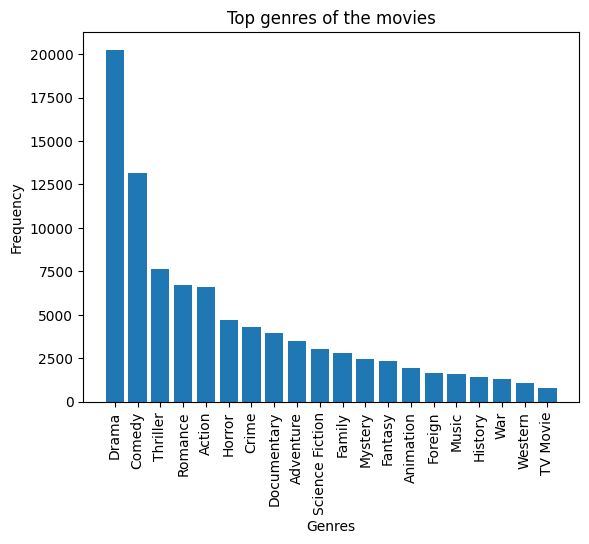

In [234]:
# Grafico de barras con el conteo de los generos

plt.bar(df_genres_count.index, df_genres_count.values)

plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top genres of the movies')
plt.xticks(rotation='vertical')

plt.show()

In [235]:
a =df_genres_concat.drop_duplicates()
a.shape[0]

33

In the entire dataset, there are 33 genres in which movies have been categorized. Additionally, one or more genres can belong to a movie. In fact, the ratio is 2 to 1 for genres to movies, meaning that each movie has at least 2 genres.

The genres with the most movies in the dataset are Drama, Comedy, Thriller, Romance, and Action.

###### "director_name"

In [236]:
# Analysis of the movie directors

directores_name = directors["director_name"].value_counts()
directores_name.shape[0]

17548

In [237]:
# Ranking of directors and the amount of movies they produced

directores_name

John Ford            66
Michael Curtiz       65
Werner Herzog        54
Alfred Hitchcock     53
Georges Méliès       51
                     ..
Burt Brinckerhoff     1
Søren Balle           1
Kurando Mitsutake     1
David Oliveras        1
Daisy Asquith         1
Name: director_name, Length: 17548, dtype: int64

In the entire dataset, there are 17,548 directors. The director with the most movies in the dataset is John Ford with 66.

It's possible to have more than one director per movie.

###### "nombre_actor"

In [239]:
# Analysis of actors feature

number_actors = actors["actors_name"].value_counts()
number_actors.shape[0]

202748

In [240]:
print("Total genres of movies in the dataset: ", actors.value_counts().sum())
print("Total movies in the dataset: ", df.shape[0])
print("That means that each movie has at least a ratio of actors per movie: ", round(actors.value_counts().sum().sum()/df.shape[0],2), " to 1")

Total genres of movies in the dataset:  564892
Total movies in the dataset:  44187
That means that each movie has at least a ratio of actors per movie:  12.78  to 1


"In the entire dataset, there are 202,748 actors who have played roles as actors or as voices for animated characters.

On average, there are 13 actors per movie.

#### Bivariate Analysis

In [246]:
# Evolution between budgets and revenues through time

evolution = df[["release_year", "budget","revenue","title"]]
evolution = evolution.groupby(["release_year"])["budget","revenue"].sum().reset_index()

fig = px.line(evolution, x=evolution['release_year'], y=evolution['revenue'], title="Movies budgets and revenues over Time")

fig.add_scatter(x=evolution['release_year'], y=evolution['budget'])
fig.show()

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\1590460342.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In this graph, we can see the relationship between budget and revenue over the years. There's a noticeable gap where movies either double or significantly multiply their budget spent.

In [245]:
# Scatter plot to see the movies and the revenues they earn through out the years

fig = px.scatter( df, x="release_year", y="revenue", hover_data = 'title', title="Movies and Their Profits Over Time")

fig.show()

Movies increased their profits over the years. There is a clear upward trend, with three data points (movies) that stand out from the rest.

These are the top 3 highest-grossing movies:

1. Avatar, released in 2009, with a revenue of 2.78 billion.
2. Star Wars: The Force Awakens, released in 2015, with a profit of 2 billion.
3. Titanic, released in 1984, with 1.84 billion."


C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\2852620247.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



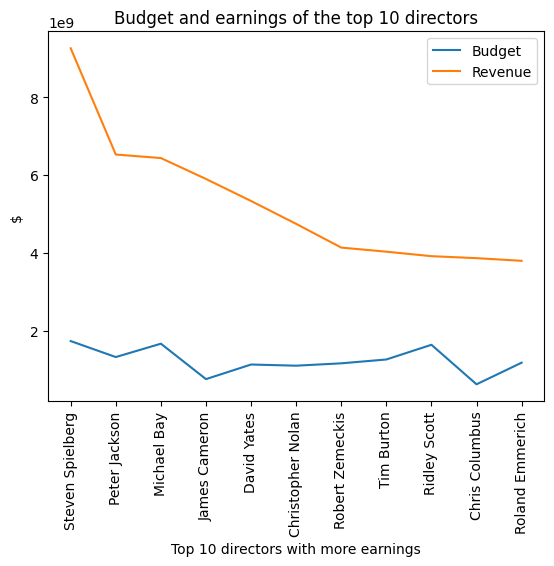

In [247]:
# Lets look at the directors that made more money

dir = df[["director_name","revenue", "budget"]].groupby(["director_name"])["budget","revenue"].sum().reset_index().sort_values( by = "revenue", ascending = False)
dir_10 = dir.iloc[0:11]
plt.plot(dir_10["director_name"], dir_10["budget"], label='Budget')
plt.plot(dir_10["director_name"], dir_10["revenue"], label='Revenue')

plt.xlabel('Top 10 directors with more earnings')
plt.ylabel('$')
plt.title('Budget and earnings of the top 10 directors')
plt.legend()
plt.xticks(dir_10["director_name"], rotation='vertical')

plt.show()

You can see the top 10 directors, who are very famous and have had great success, generating double or more in revenue compared to the budget invested in the movies they directed.

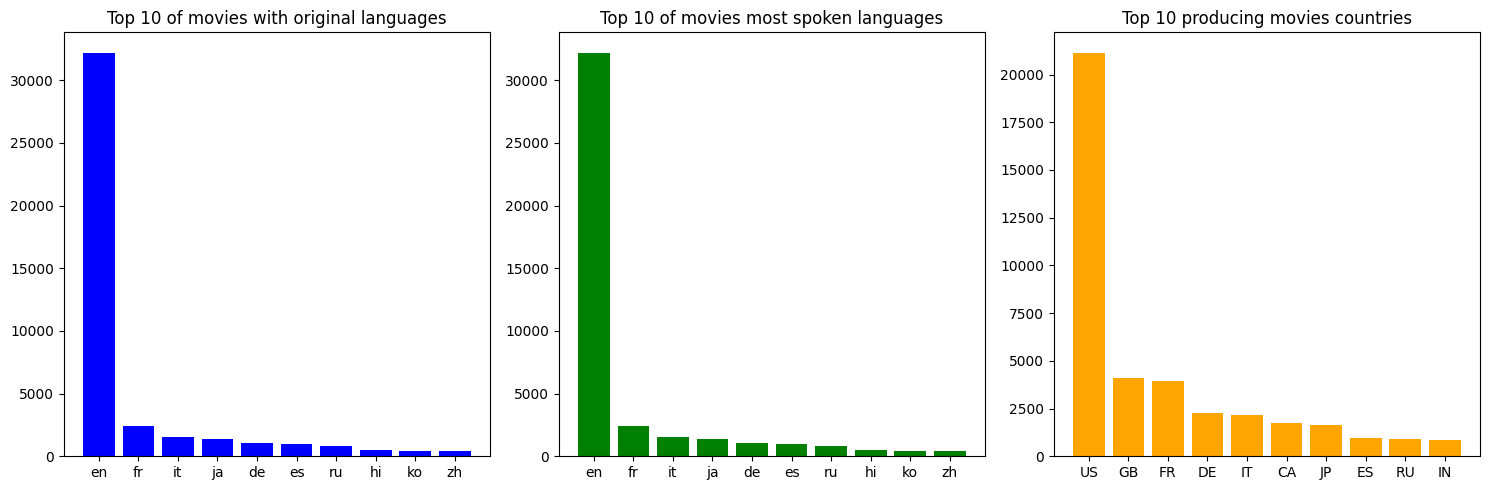

In [252]:
# Chart to compare and view together the top 10 movies in their original languages, the most spoken languages, and the top 10 production companies

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(top_10_ol.country_code, top_10_ol.original_language.values , color='blue')
axes[0].set_title('Top 10 of movies with original languages')

axes[1].bar(df_language_top_10.country_code, df_language_top_10.original_language.values, color='green')
axes[1].set_title('Top 10 of movies most spoken languages')

axes[2].bar(df_countries_top_10.index, df_countries_top_10.values, color='orange')
axes[2].set_title('Top 10 producing movies countries')

plt.tight_layout()

plt.show()

While we have already discussed the relationship between these three variables concerning movies: original languages, spoken languages, and producing countries, there is an interesting and logical dominance of English. This can also be seen in the primary languages of the countries that produce the most movies.

In [253]:
country_budget = df[["budget", "production_countries_names"]].explode("production_countries_names")
country_budget = country_budget.groupby("production_countries_names").sum().sort_values(by ="budget", ascending = False)
country_budget_top_10 = country_budget.iloc[0:10]
country_budget_top_10 = pd.DataFrame(country_budget_top_10)

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\2783195812.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




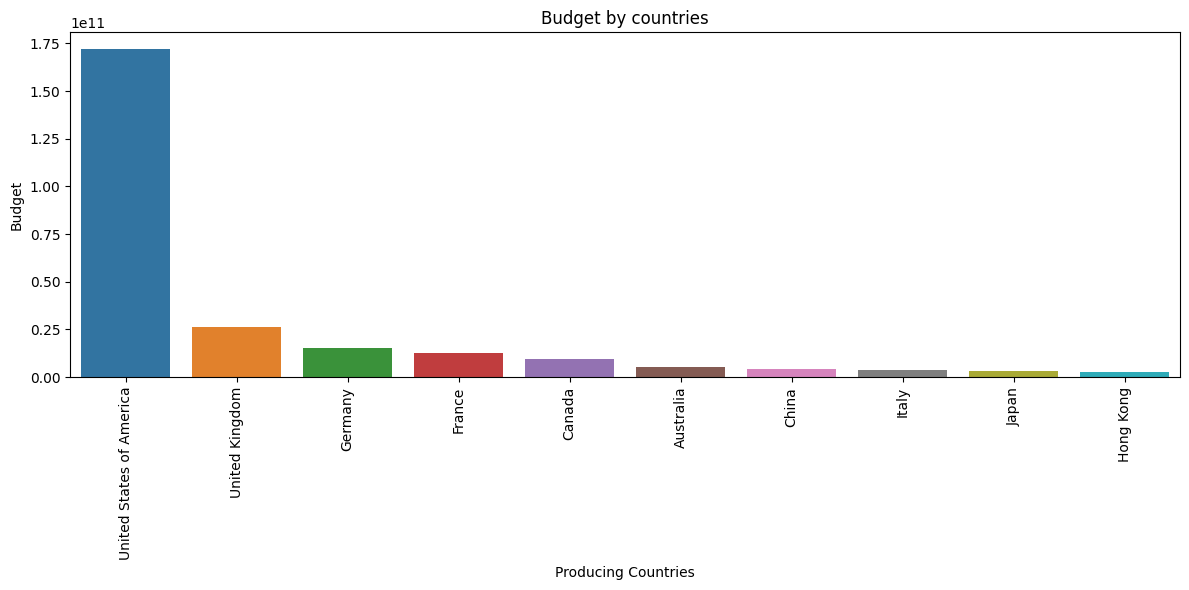

In [254]:
# Top 10 of the countries with more budget to produce movies

plt.figure(figsize=(12, 6))
sns.barplot(data=country_budget_top_10, x=country_budget_top_10.index, y=country_budget_top_10.budget, ci=None)
plt.xlabel("Producing Countries")
plt.ylabel("Budget")
plt.title("Budget by countries")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

This chart, in relation to the predominance we have been observing, also follows the logic of the budget allocation in these countries. Although the value of this column is not complete, it reflects the same trend.

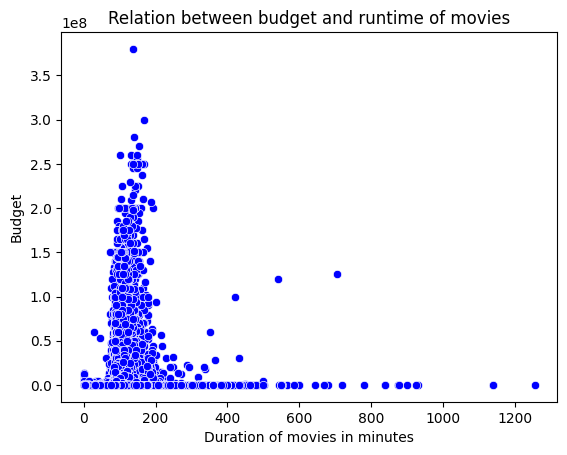

In [255]:
# Relation between runtime vs budget

sns.scatterplot(x=df["runtime"], y=df["budget"], marker='o', color='blue')

plt.xlabel('Duration of movies in minutes')
plt.ylabel('Budget')
plt.title('Relation between budget and runtime of movies')

plt.show()

There isn't a strong relationship between what would be the budget and the duration of the movie. Isolated data points show what would be logical: longer movies tend to have higher budgets. However, there isn't a clear trend or correlation between the variables.

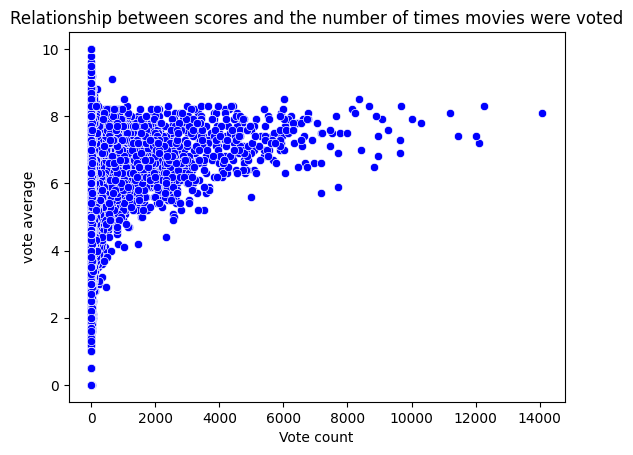

In [256]:
# Relation between the amount of votes and the are average score

sns.scatterplot(x=df["vote_count"], y=df["vote_average"], marker='o', color='blue')

plt.xlabel('Vote count')
plt.ylabel('vote average')
plt.title('Relationship between scores and the number of times movies were voted')

plt.show()

This graph shows the relationship between the number of votes and the average score obtained. In other words, one should establish criteria when relying on these variables for conducting deeper analyses. I do not consider it appropriate to evaluate movies based on their score when they have fewer than 500 votes.

In other words, I would only consider their votes as valid when a movie has at least 500 votes from moviegoers.

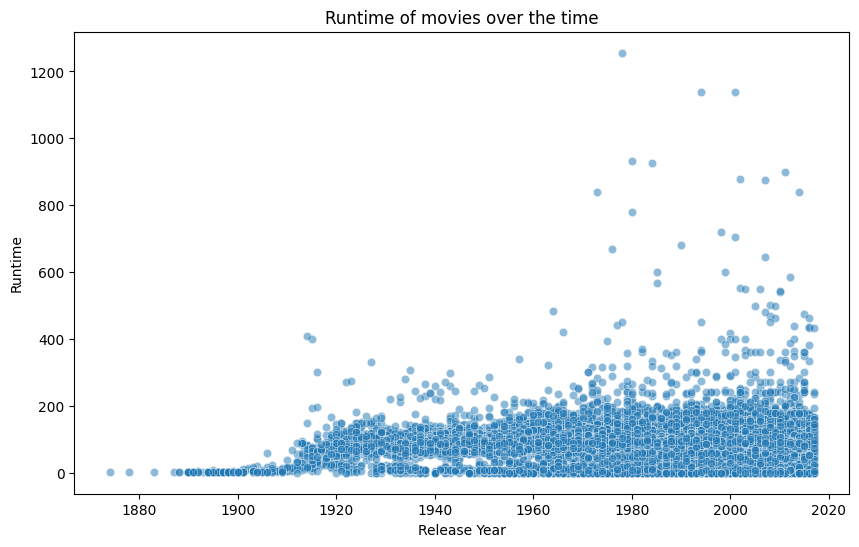

In [257]:
# Runtime of movies over the time

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='runtime', alpha=0.5)

plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Runtime of movies over the time')

plt.show()

We can see that in the early days of cinema, movies had very short durations. This was due to the complexity and limited technology available for movie production during those times, as well as the underdeveloped nature of the industry and its relatively low popularity.

In [258]:
df_score = df[["vote_average", "popularity","vote_count"]]
df_score_calificado = df_score[df_score["vote_count"]>500]


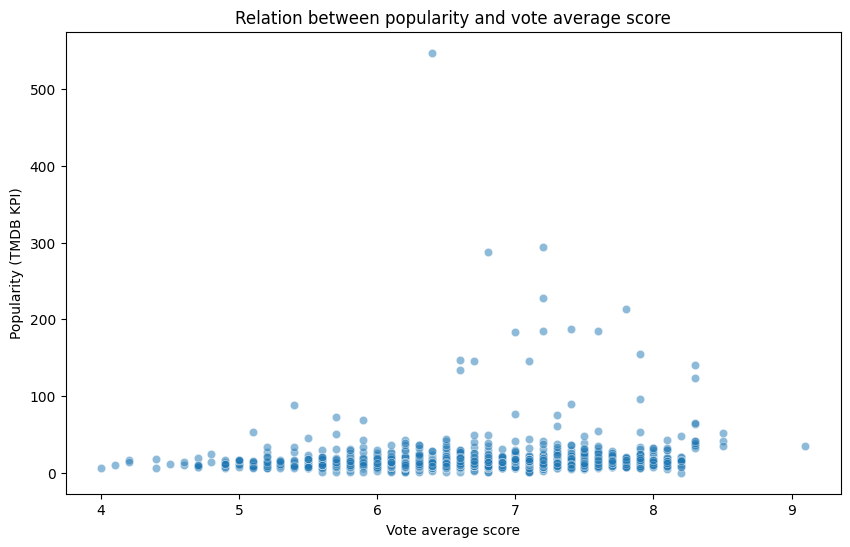

In [259]:
# popularity vs vote average

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_score_calificado, x='vote_average', y='popularity', alpha=0.5)

plt.xlabel('Vote average score')
plt.ylabel('Popularity (TMDB KPI)')
plt.title('Relation between popularity and vote average score')

plt.show()

I filtered the dataset to focus on scores that I believe are 'qualifiable,' those with a vote count greater than 500.

There seems to be a slight relationship between popularity and the score given by moviegoers. This means that both scores roughly classify movies similarly, making them both good indicators to consider when assessing a movie's quality.

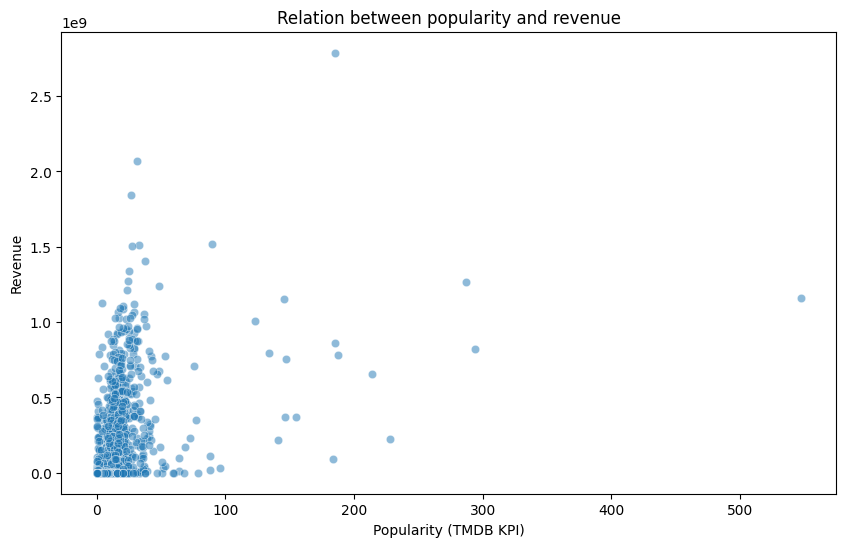

In [260]:
# popularity vs revenue

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='revenue', alpha=0.5)

plt.xlabel('Popularity (TMDB KPI)')
plt.ylabel('Revenue')
plt.title('Relation between popularity and revenue')

plt.show()

We can see a relationship between popularity and revenue, which makes sense as it implicitly considers reaching a large audience. The more views and popular a movie is, the higher its revenue.

Additionally, considering user ratings, the more views a movie has, and taking into account user interactions like votes, favorites, and more, the higher its popularity score tends to be, as reflected in the popularity calculation.

## MACHINE LEARNING RECOMMENDATION MODEL

Taking into account the analyzed dataset variables, it seems pertinent to build a recommendation model using K-Nearest Neighbors (KNN) to provide movie recommendations.

The variables to consider for the model are as follows:

- Popularity: It's a previously analyzed score used in TMDB as a recommendation system, and it appears to be a good indicator for finding similar movies.

- Genres: Movies of the same genre tend to be similar in broad strokes. Genre is the general theme classified for a movie. In other words, two comedy movies are likely to be more similar than a comedy and a horror movie.

- Overview | Tagline: Movies with similar descriptions and themes are more likely and appropriate to recommend to a user who likes that movie.

- Spoken Languages: As we saw, the majority of movies are concentrated in a few languages. However, language can be a barrier when it comes to watching a movie. Therefore, it's an important variable to consider because, no matter how related two movies are, if the language doesn't align with the viewer, the recommendation may be inaccurate.

- Directors: I believe it's appropriate to include directors in the model because directors have a specific style of filmmaking, making it a useful variable to consider.

- Actors: Some actors deliver outstanding performances, so I consider it an important variable to include in the model. If you like a movie featuring a particular actor, it's likely you'll enjoy other movies they've acted in.

- Movies franchise: This column, while not all movies have a sequel or belong to a collection, is relevant for recommending similar movies.

- Runtime: Movies with similar durations, while not the most significant variable for recommending movies, are worth considering in recommendations based on duration."






I can't run it with all the variables due to memory constraints. 

I'm using genres, which I consider the most important. However, I wanted to mention what I would really consider for the recommendation model if resources were available.

In [262]:
# Filter the df for modelling

model = df[["title","popularity","genres_names",  "director_name", "actors_name", "name_belongs_to_collection", "runtime", "overview", "tagline"]]


In [263]:
model.head()

title  popularity                  genres_names  \
0                    Toy Story   21.946943   [Animation, Comedy, Family]   
1                      Jumanji   17.015539  [Adventure, Fantasy, Family]   
2             Grumpier Old Men   11.712900             [Romance, Comedy]   
3            Waiting to Exhale    3.859495      [Comedy, Drama, Romance]   
4  Father of the Bride Part II    8.387519                      [Comedy]   

     director_name                                        actors_name  \
0    John Lasseter  'Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1     Joe Johnston  'Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2    Howard Deutch  'Walter Matthau, Jack Lemmon, Ann-Margret, Sop...   
3  Forest Whitaker  'Whitney Houston, Angela Bassett, Loretta Devi...   
4    Charles Shyer  'Steve Martin, Diane Keaton, Martin Short, Kim...   

       name_belongs_to_collection  runtime  \
0            Toy Story Collection     81.0   
1                             NaN    104.0   
2       Grumpy Old Men Collection    101.0   
3                             NaN    127.0   
4  Father of the Bride Collection    106.0   

                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                                             tagline  
0                                                NaN  
1          Roll the dice and unleash the excitement!  
2  Still Yelling. Still Fighting. Still Ready for...  
3  Friends are the people who let you be yourself...  
4  Just When His World Is Back To Normal... He's ...

In [264]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44187 entries, 0 to 44539
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       44187 non-null  object 
 1   popularity                  44187 non-null  float64
 2   genres_names                44187 non-null  object 
 3   director_name               44187 non-null  object 
 4   actors_name                 44187 non-null  object 
 5   name_belongs_to_collection  4433 non-null   object 
 6   runtime                     44187 non-null  float64
 7   overview                    43334 non-null  object 
 8   tagline                     20122 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.4+ MB


In [265]:
model["genres_names"] = model["genres_names"].astype(str).str.replace("[", "")
model["genres_names"] = model["genres_names"].astype(str).str.replace("]", "")
model["genres_names"] = model["genres_names"].astype(str).str.replace(",", "")
model["genres_names"] = model["genres_names"].astype(str).str.replace("'", "")
model

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\177913813.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\177913813.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\177913813.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\177913813.py:2: SettingWithCopyWarning:


A value is t

title  popularity              genres_names  \
0                        Toy Story   21.946943   Animation Comedy Family   
1                          Jumanji   17.015539  Adventure Fantasy Family   
2                 Grumpier Old Men   11.712900            Romance Comedy   
3                Waiting to Exhale    3.859495      Comedy Drama Romance   
4      Father of the Bride Part II    8.387519                    Comedy   
...                            ...         ...                       ...   
44535                   Robin Hood    5.683753      Drama Action Romance   
44536          Century of Birthing    0.178241                     Drama   
44537                     Betrayal    0.903007     Action Drama Thriller   
44538             Satan Triumphant    0.003503                             
44539                     Queerama    0.163015                             

          director_name                                        actors_name  \
0         John Lasseter  'Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1          Joe Johnston  'Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2         Howard Deutch  'Walter Matthau, Jack Lemmon, Ann-Margret, Sop...   
3       Forest Whitaker  'Whitney Houston, Angela Bassett, Loretta Devi...   
4         Charles Shyer  'Steve Martin, Diane Keaton, Martin Short, Kim...   
...                 ...                                                ...   
44535        John Irvin  'Patrick Bergin, Uma Thurman, David Morrissey,...   
44536          Lav Diaz  'Angel Aquino, Perry Dizon, Hazel Orencio, Joe...   
44537    Mark L. Lester  'Erika Eleniak, Adam Baldwin, Julie du Page, J...   
44538  Yakov Protazanov  'Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...   
44539     Daisy Asquith                                                 ''   

           name_belongs_to_collection  runtime  \
0                Toy Story Collection     81.0   
1                                 NaN    104.0   
2           Grumpy Old Men Collection    101.0   
3                                 NaN    127.0   
4      Father of the Bride Collection    106.0   
...                               ...      ...   
44535                             NaN    104.0   
44536                             NaN    360.0   
44537                             NaN     90.0   
44538                             NaN     87.0   
44539                             NaN     75.0   

                                                overview  \
0      Led by Woody, Andy's toys live happily in his ...   
1      When siblings Judy and Peter discover an encha...   
2      A family wedding reignites the ancient feud be...   
3      Cheated on, mistreated and stepped on, the wom...   
4      Just when George Banks has recovered from his ...   
...                                                  ...   
44535  Yet another version of the classic epic, with ...   
44536  An artist struggles to finish his work while a...   
44537  When one of her hits goes wrong, a professiona...   
44538  In a small town live two brothers, one a minis...   
44539  50 years after decriminalisation of homosexual...   

                                                 tagline  
0                                                    NaN  
1              Roll the dice and unleash the excitement!  
2      Still Yelling. Still Fighting. Still Ready for...  
3      Friends are the people who let you be yourself...  
4      Just When His World Is Back To Normal... He's ...  
...                                                  ...  
44535                                                NaN  
44536                                                NaN  
44537                             A deadly game of wits.  
44538                                                NaN  
44539                                                NaN  

[44187 rows x 9 columns]

In [266]:
model["genres_names"] = model["genres_names"].astype(str).str.replace(r'[\'"\s\[\]{}\\]', ' ', regex=True) 
model

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\4012567679.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



title  popularity              genres_names  \
0                        Toy Story   21.946943   Animation Comedy Family   
1                          Jumanji   17.015539  Adventure Fantasy Family   
2                 Grumpier Old Men   11.712900            Romance Comedy   
3                Waiting to Exhale    3.859495      Comedy Drama Romance   
4      Father of the Bride Part II    8.387519                    Comedy   
...                            ...         ...                       ...   
44535                   Robin Hood    5.683753      Drama Action Romance   
44536          Century of Birthing    0.178241                     Drama   
44537                     Betrayal    0.903007     Action Drama Thriller   
44538             Satan Triumphant    0.003503                             
44539                     Queerama    0.163015                             

          director_name                                        actors_name  \
0         John Lasseter  'Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1          Joe Johnston  'Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2         Howard Deutch  'Walter Matthau, Jack Lemmon, Ann-Margret, Sop...   
3       Forest Whitaker  'Whitney Houston, Angela Bassett, Loretta Devi...   
4         Charles Shyer  'Steve Martin, Diane Keaton, Martin Short, Kim...   
...                 ...                                                ...   
44535        John Irvin  'Patrick Bergin, Uma Thurman, David Morrissey,...   
44536          Lav Diaz  'Angel Aquino, Perry Dizon, Hazel Orencio, Joe...   
44537    Mark L. Lester  'Erika Eleniak, Adam Baldwin, Julie du Page, J...   
44538  Yakov Protazanov  'Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...   
44539     Daisy Asquith                                                 ''   

           name_belongs_to_collection  runtime  \
0                Toy Story Collection     81.0   
1                                 NaN    104.0   
2           Grumpy Old Men Collection    101.0   
3                                 NaN    127.0   
4      Father of the Bride Collection    106.0   
...                               ...      ...   
44535                             NaN    104.0   
44536                             NaN    360.0   
44537                             NaN     90.0   
44538                             NaN     87.0   
44539                             NaN     75.0   

                                                overview  \
0      Led by Woody, Andy's toys live happily in his ...   
1      When siblings Judy and Peter discover an encha...   
2      A family wedding reignites the ancient feud be...   
3      Cheated on, mistreated and stepped on, the wom...   
4      Just when George Banks has recovered from his ...   
...                                                  ...   
44535  Yet another version of the classic epic, with ...   
44536  An artist struggles to finish his work while a...   
44537  When one of her hits goes wrong, a professiona...   
44538  In a small town live two brothers, one a minis...   
44539  50 years after decriminalisation of homosexual...   

                                                 tagline  
0                                                    NaN  
1              Roll the dice and unleash the excitement!  
2      Still Yelling. Still Fighting. Still Ready for...  
3      Friends are the people who let you be yourself...  
4      Just When His World Is Back To Normal... He's ...  
...                                                  ...  
44535                                                NaN  
44536                                                NaN  
44537                             A deadly game of wits.  
44538                                                NaN  
44539                                                NaN  

[44187 rows x 9 columns]

In [267]:
model.to_csv("model.csv", index = False)

#### KNN Model

K-Nearest Neighbors (KNN) is a machine learning algorithm that works by taking a data point and finding the 'K' nearest data points in a training set based on some distance metric (such as Euclidean distance). Then, KNN classifies or predicts the value of the data point based on the labels or values of the nearby neighbors. It is a supervised learning method and is used in a wide range of applications, from text classification to recommendation systems.

This articles explains it great: https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4#:~:text=K%2Dnearest%20neighbors%20(KNN),closet%20to%20the%20test%20data.

In [282]:
def recommendation(given_movie:str):
    '''
    You enter a movie title, and it recommends similar ones in a list
    '''

    # Search for the movie title in the feature 'title'
    movie = model[model['title'] == given_movie]

    if len(movie) == 0:
        return {"message":"The movie you are looking for is not in our database."}

    # Getting the genre and popularity of the movie
    movie_genre = movie['genres_names'].values[0]
    movie_popularity = movie['popularity'].values[0]

    # Features characteristics for modelling with KNN
    features = model[['popularity']]
    genres = model['genres_names'].str.get_dummies(sep=' ')
    features = pd.concat([features, genres], axis=1)

    # Handling of missing values (NaN) replacing them by zeros
    features = features.fillna(0)

    # Nearest neighbours model
    nn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')
    nn_model.fit(features)

    # Finding the more similar movies(excluding the movie which the user has given as an input)
    _, indices = nn_model.kneighbors([[movie_popularity] + [0] * len(genres.columns)], n_neighbors=6)
    similar_movies_indices = indices[0][1:]  # Exluding the first movie of the same query
    recommendations = model.iloc[similar_movies_indices]['title']

    # Si la película de consulta está en la lista de recomendaciones, la eliminamos
    if given_movie in recommendations.tolist():
        recommendations = recommendations[recommendations != given_movie]

    return {'Recommendation list': 
            recommendations}



In [283]:
# Test 

recommendation("Toy Story")

C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



{'Recommendation list': 17031        The Hangover Part II
 13141                Seven Pounds
 41148                  Fist Fight
 11088    The Pursuit of Happyness
 2583                 Ghostbusters
 Name: title, dtype: object}

#### TF-IDF MODEL - COSINE SIMILARITY

TF-IDF stands for 'Term Frequency-Inverse Document Frequency,' a numerical statistic that reflects the importance of a word in a document or a collection of documents. The algorithm works by calculating the frequency of a word in a document and comparing it to its frequency in the entire document collection.

Cosine similarity is a statistical measure that evaluates how similar two vectors or documents are by calculating the cosine of the angle between them in a vector space. It is commonly used to compare the similarity between texts or documents, considering both the magnitude and direction of the vectors. The closer the result is to the value of 1, the more similar the documents are; the closer it is to 0, the less similar they are. This metric is useful for finding similarities in textual datasets or for content-based recommendations.

Article that explains it very well: https://medium.com/geekculture/understanding-tf-idf-and-cosine-similarity-for-recommendation-engine-64d8b51aa9f9

In [284]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44187 entries, 0 to 44539
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       44187 non-null  object 
 1   popularity                  44187 non-null  float64
 2   genres_names                44187 non-null  object 
 3   director_name               44187 non-null  object 
 4   actors_name                 44187 non-null  object 
 5   name_belongs_to_collection  4433 non-null   object 
 6   runtime                     44187 non-null  float64
 7   overview                    43334 non-null  object 
 8   tagline                     20122 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.4+ MB


In [285]:
df_movies2 = model[[ 'overview', 'title', 'popularity']]
df_movies_sorted= df_movies2.sort_values(ascending=False, by='popularity')

In [286]:
df_movies2["overview"] = df_movies2["overview"].astype(str)

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\2766466080.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [287]:
#df_top_5= df_movies_sorted.sample(15000) 

In [288]:
## I define a TF-IDF vectorizer object. I remove stop words in English such as 'the' and 'a'.
tfidf= TfidfVectorizer(stop_words='english')

In [289]:
df_movies2['overview'].isna().sum()#fillna('')


0

In [290]:
df_movies2['overview'] = df_movies2['overview'].fillna('')

C:\Users\tomas\AppData\Local\Temp\ipykernel_18440\732604858.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [291]:
df_movies2.head(2)

overview      title  popularity
0  Led by Woody, Andy's toys live happily in his ...  Toy Story   21.946943
1  When siblings Judy and Peter discover an encha...    Jumanji   17.015539

In [292]:

tfidf_matrix = tfidf.fit_transform(df_movies2['overview'])

tfidf_matrix.shape

(44187, 74447)

In [293]:
# We create the cosine similarity matrix

cosine_sim= linear_kernel(tfidf_matrix, tfidf_matrix)

In [294]:
## Mechanism to identify the index of a movie in our DataFrame given its title

indices=pd.Series(df_movies2.index, index=df_movies2['title']).drop_duplicates()

In [295]:
## We define a function that takes the title of a movie as input and generates a list of the 5 most similar movies

def recommendations_improved (title, cosine_sim=cosine_sim):
    
    idx= indices[title]
    
    sim_scores= list(enumerate(cosine_sim[idx]))
    
    sim_scores= sorted(sim_scores, key=lambda x : x[1], reverse=True)
    
    sim_scores=sim_scores[1:6]
    
    movies_indices= [i[0] for i in sim_scores]
    
    return df_movies2['title'].iloc[movies_indices]


In [296]:
recommendations_improved('Toy Story')

15266                    Toy Story 3
2978                     Toy Story 2
10252         The 40 Year Old Virgin
24255                      Small Fry
23584    Andy Hardy's Blonde Trouble
Name: title, dtype: object

TF-IDF with cosine similarity, I consider it a more accurate algorithm than KNN. However, I can't deploy it because it's a heavier algorithm to run on the render.